# Manage a portfolio of multiple strategies using Python

### Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import datetime
import math
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import cvxopt as opt
from cvxopt import blas, solvers
import cvxpy as cp
import pyfolio as pf

/Users/Mario/opt/anaconda3/envs/EPAT36/lib/python3.6/site-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


**Strategy A - Trend following system - Instrument 1**

Here we have simulated the return of a trend following strategy and forced it to have a Sharpe Ratio of 0.5 and a skewness of 1.

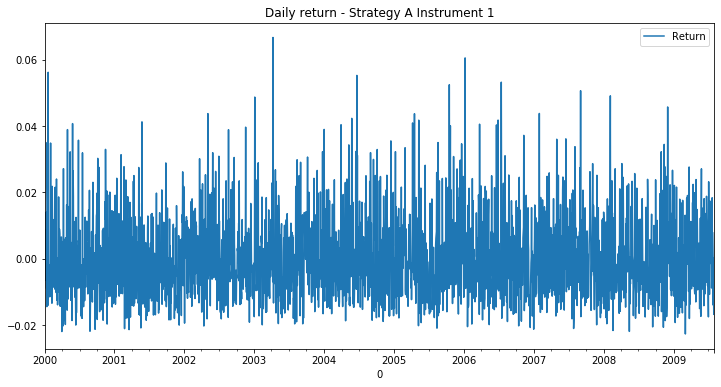

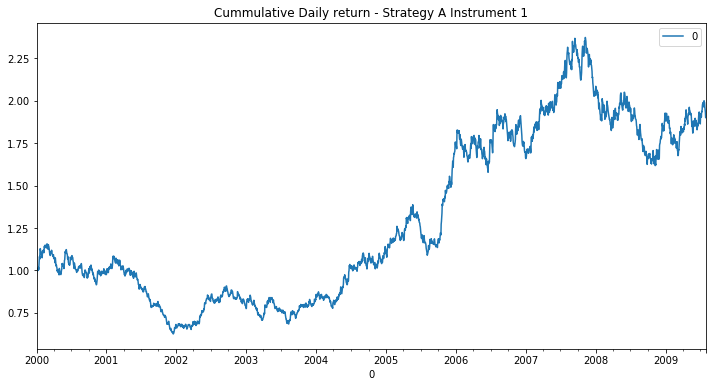

In [2]:
StrategyA1_SR05_SKW1_returns = pd.read_csv('StrategyA1_SR0.5_SKW1.csv', header=None, parse_dates=True, index_col=0)
StrategyA1_SR05_SKW1_returns.columns=['Return']

#print(Strategy_A_Instrument_1_returns.head())
StrategyA1_SR05_SKW1_returns.plot(title = 'Daily return - Strategy A Instrument 1', figsize=(12, 6))

cum_datalist=[1+x for x in StrategyA1_SR05_SKW1_returns['Return']] 
cum_datalist=pd.DataFrame(cum_datalist, index=StrategyA1_SR05_SKW1_returns.index)
cum_datalist.cumprod().plot(title = 'Cummulative Daily return - Strategy A Instrument 1', figsize=(12, 6))

**Strategy A - Trend following system - Instrument 2**

Here we have simulated the return of a trend following strategy and forced it to have a Sharpe Ratio of 1 and a skewness of 1.

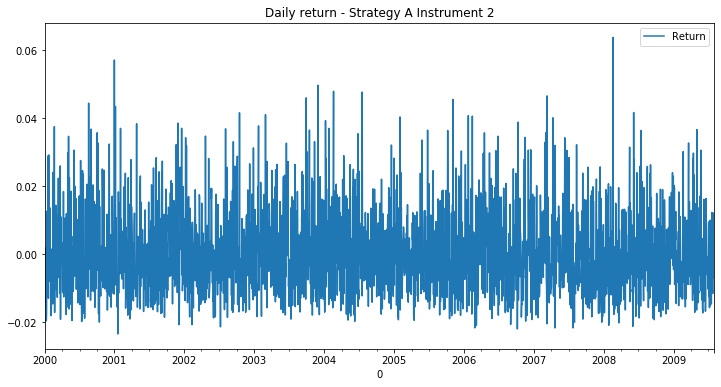

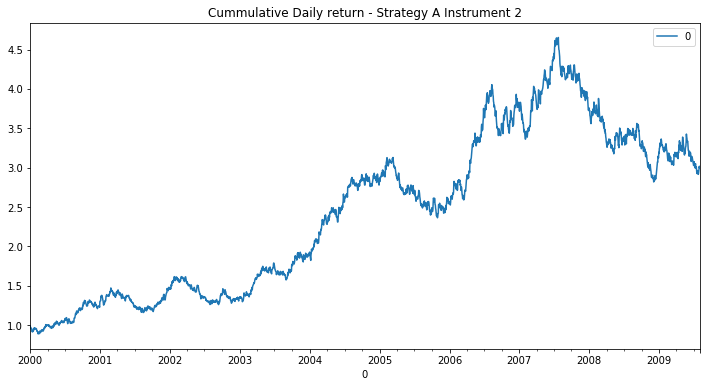

In [3]:
StrategyA2_SR1_SKW1_returns = pd.read_csv('StrategyA2_SR1_SKW1.csv', header=None, parse_dates=True, index_col=0)
StrategyA2_SR1_SKW1_returns.columns=['Return']

#print(Strategy_A_Instrument_1_returns.head())
StrategyA2_SR1_SKW1_returns.plot(title = 'Daily return - Strategy A Instrument 2', figsize=(12, 6))

cum_datalist=[1+x for x in StrategyA2_SR1_SKW1_returns['Return']] 
cum_datalist=pd.DataFrame(cum_datalist, index=StrategyA2_SR1_SKW1_returns.index)
cum_datalist.cumprod().plot(title = 'Cummulative Daily return - Strategy A Instrument 2', figsize=(12, 6))

**Strategy A - Trend following system - Instrument 3**

Here we have simulated the return of a trend following strategy and forced it to have a Sharpe Ratio of 1 and a skewness of 1.

Although it has the same characteristics as the previous one, the volatility is different and allows us to evaluate its contribution within the portfolio.

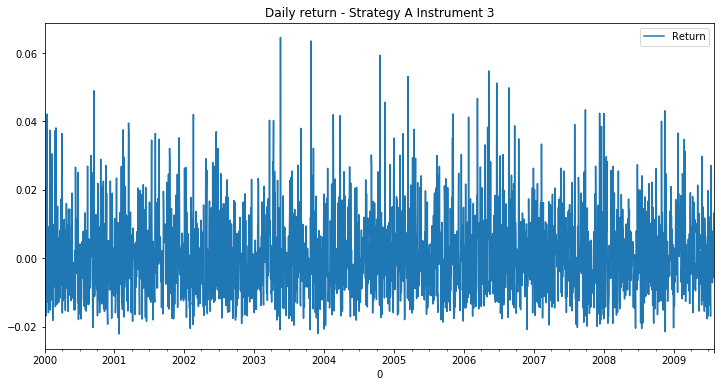

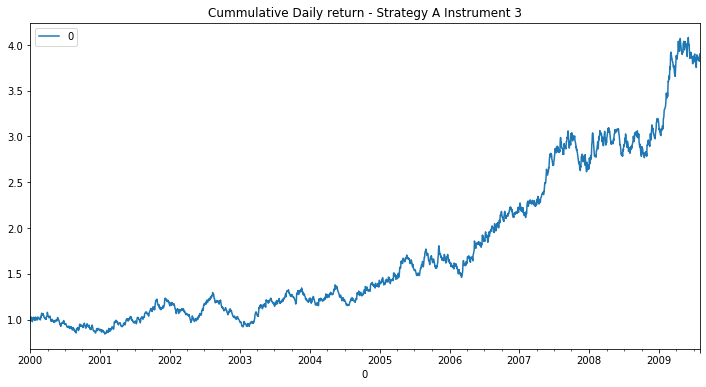

In [4]:
StrategyA3_SR1_SKW1_returns = pd.read_csv('StrategyA3_SR1_SKW1.csv', header=None, parse_dates=True, index_col=0)
StrategyA3_SR1_SKW1_returns.columns=['Return']

#print(Strategy_A_Instrument_1_returns.head())
StrategyA3_SR1_SKW1_returns.plot(title = 'Daily return - Strategy A Instrument 3', figsize=(12, 6))

cum_datalist=[1+x for x in StrategyA3_SR1_SKW1_returns['Return']] 
cum_datalist=pd.DataFrame(cum_datalist, index=StrategyA3_SR1_SKW1_returns.index)
cum_datalist.cumprod().plot(title = 'Cummulative Daily return - Strategy A Instrument 3', figsize=(12, 6))

**Strategy B - Mean reversion system - Instrument 1**

Here we have simulated the return of a mean reversion strategy and forced it to have a Sharpe Ratio of 0.5 and a skewness of -1.

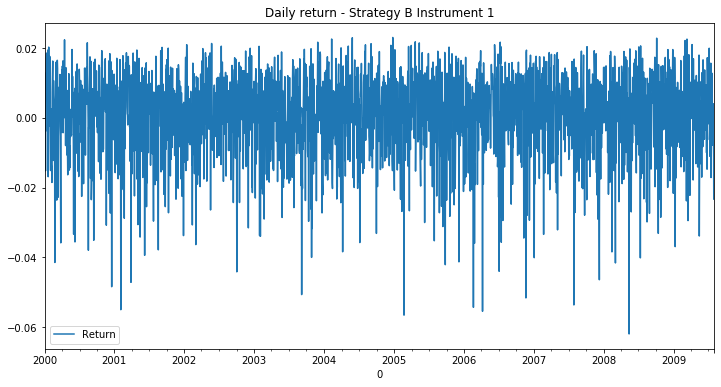

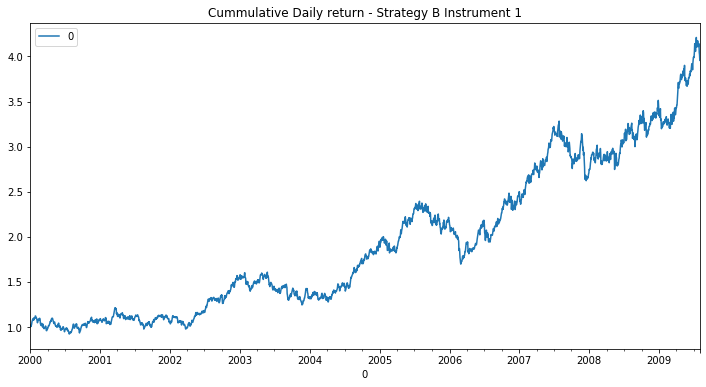

In [5]:
StrategyB1_SR05_SKWn1_returns = pd.read_csv('StrategyB1_SR0.5_SKW-1.csv', header=None, parse_dates=True, index_col=0)
StrategyB1_SR05_SKWn1_returns.columns=['Return']

#print(Strategy_A_Instrument_1_returns.head())
StrategyB1_SR05_SKWn1_returns.plot(title = 'Daily return - Strategy B Instrument 1', figsize=(12, 6))

cum_datalist=[1+x for x in StrategyB1_SR05_SKWn1_returns['Return']] 
cum_datalist=pd.DataFrame(cum_datalist, index=StrategyB1_SR05_SKWn1_returns.index)
cum_datalist.cumprod().plot(title = 'Cummulative Daily return - Strategy B Instrument 1', figsize=(12, 6))

**Strategy B - Mean reversion system - Instrument 2**

Here we have simulated the return of a mean reversion strategy and forced it to have a Sharpe Ratio of 1 and a skewness of -1.

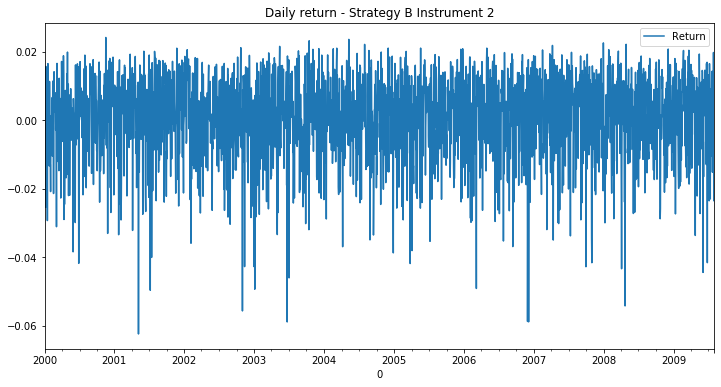

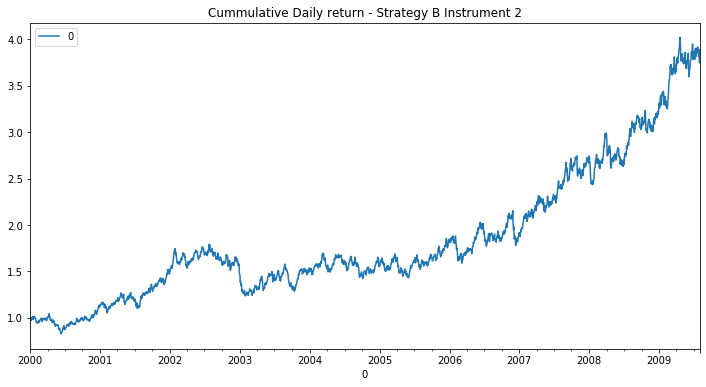

In [6]:
StrategyB2_SR1_SKWn1_returns = pd.read_csv('StrategyB2_SR1_SKW-1.csv', header=None, parse_dates=True, index_col=0)
StrategyB2_SR1_SKWn1_returns.columns=['Return']

#print(Strategy_A_Instrument_1_returns.head())
StrategyB2_SR1_SKWn1_returns.plot(title = 'Daily return - Strategy B Instrument 2', figsize=(12, 6))

cum_datalist=[1+x for x in StrategyB2_SR1_SKWn1_returns['Return']] 
cum_datalist=pd.DataFrame(cum_datalist, index=StrategyB2_SR1_SKWn1_returns.index)
cum_datalist.cumprod().plot(title = 'Cummulative Daily return - Strategy B Instrument 2', figsize=(12, 6))

**Portfolio with strategies A & B - 5 Instruments**

In order to facilitate the analysis, we create a dataframe with all the returns we have.

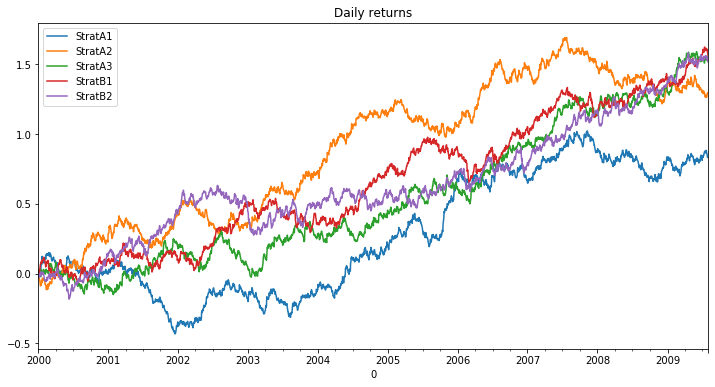

In [7]:
Strategies_A_B = pd.concat([StrategyA1_SR05_SKW1_returns, StrategyA2_SR1_SKW1_returns, StrategyA3_SR1_SKW1_returns, StrategyB1_SR05_SKWn1_returns, StrategyB2_SR1_SKWn1_returns], axis=1, ignore_index=False)
Strategies_A_B.columns=['StratA1', 'StratA2', 'StratA3', 'StratB1', 'StratB2']
Strategies_A_B.cumsum().plot(title = 'Daily returns', figsize=(12, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bb8b278>,
      dtype=object)

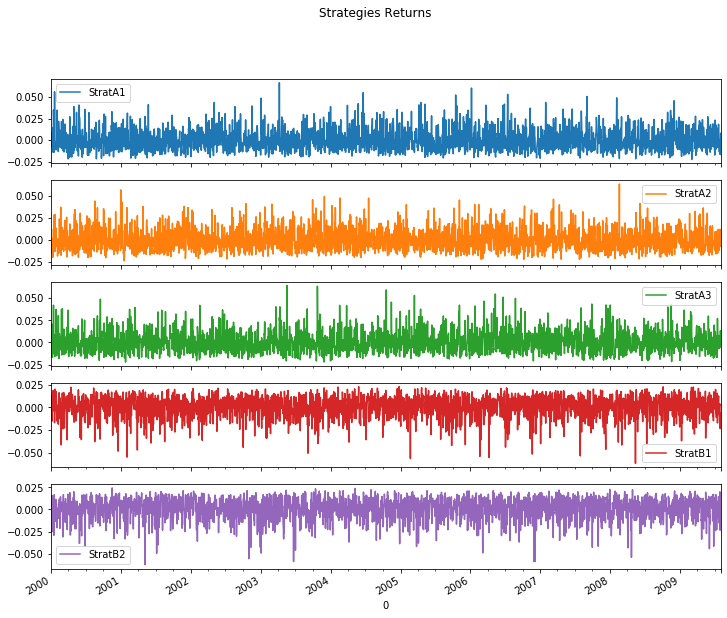

In [8]:
Strategies_A_B.plot(title="Strategies Returns", figsize=(12,10),subplots=True)

**Portfolio with the strategy A - 3 Instruments**

In order to facilitate the analysis, we create a dataframe with all the strategy A returns.

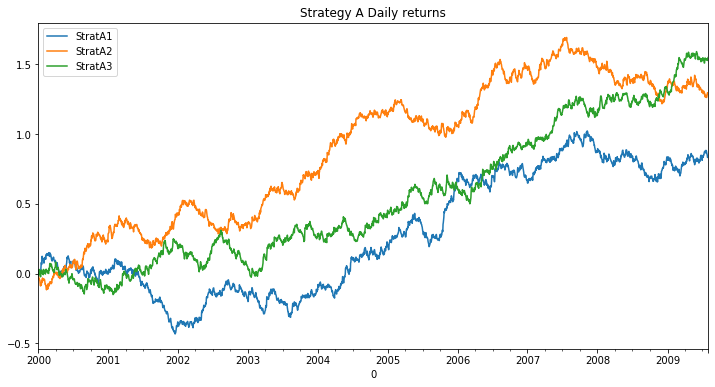

In [9]:
Strategy_A = pd.concat([StrategyA1_SR05_SKW1_returns, StrategyA2_SR1_SKW1_returns, StrategyA3_SR1_SKW1_returns], axis=1, ignore_index=False)
Strategy_A.columns=['StratA1', 'StratA2', 'StratA3']
Strategy_A.cumsum().plot(title = 'Strategy A Daily returns', figsize=(12, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d3172e8>,
      dtype=object)

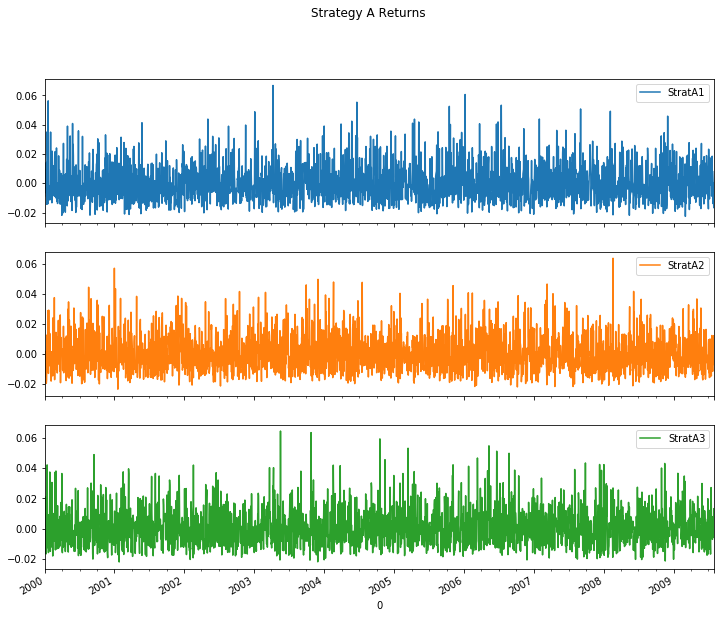

In [10]:
Strategy_A.plot(title="Strategy A Returns", figsize=(12,10),subplots=True)

**Portfolio with the strategy B - 2 Instruments**

In order to facilitate the analysis, we create a dataframe with all the strategy B returns.

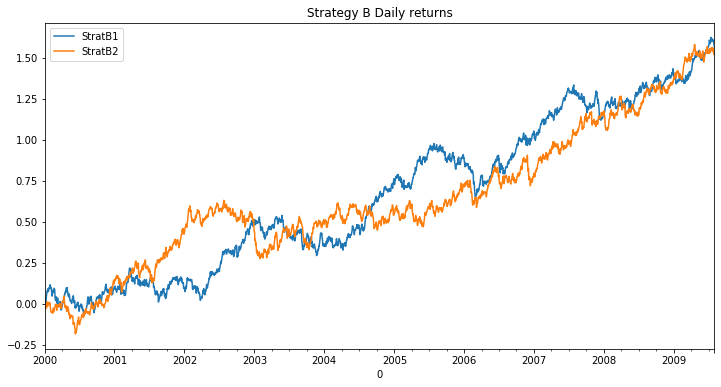

In [11]:
Strategy_B = pd.concat([StrategyB1_SR05_SKWn1_returns, StrategyB2_SR1_SKWn1_returns], axis=1, ignore_index=False)
Strategy_B.columns=['StratB1', 'StratB2']
Strategy_B.cumsum().plot(title = 'Strategy B Daily returns', figsize=(12, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e0752e8>,
      dtype=object)

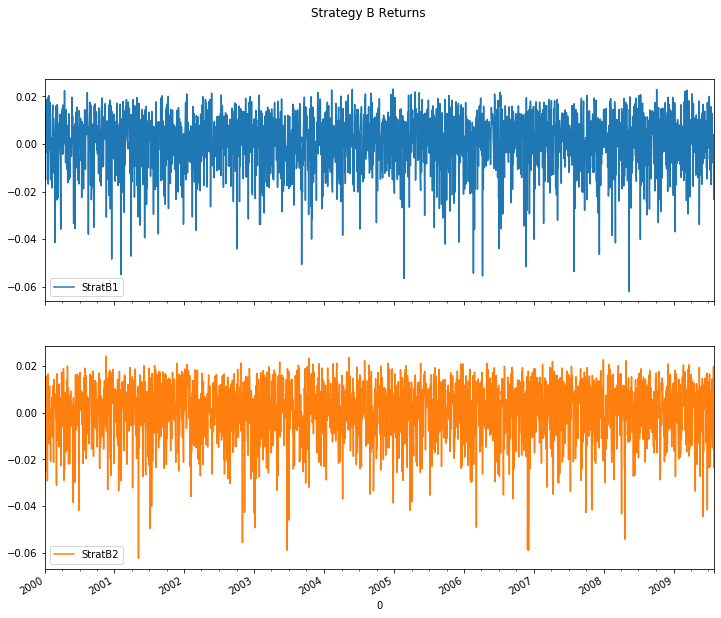

In [12]:
Strategy_B.plot(title="Strategy B Returns", figsize=(12,10),subplots=True)

## Basic analysis

Some basic functions to characterize individually the returns.

In [13]:
Strategies_A_B.describe()

StratA1      StratA2      StratA3      StratB1      StratB2
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean      0.000336     0.000518     0.000619     0.000625     0.000613
std       0.012382     0.012449     0.012265     0.012167     0.012487
min      -0.022628    -0.023483    -0.022159    -0.061927    -0.062419
25%      -0.008736    -0.008848    -0.008323    -0.006073    -0.006649
50%      -0.001367    -0.001429    -0.001100     0.002460     0.002505
75%       0.007027     0.007482     0.007427     0.009481     0.009931
max       0.066684     0.063726     0.064527     0.023033     0.024209

### Return distribution

In [14]:
Strategies_A_B.kurtosis()

StratA1    1.457507
StratA2    0.905275
StratA3    1.603533
StratB1    1.689942
StratB2    1.401474
dtype: float64

In [15]:
Strategies_A_B.skew()

StratA1    0.975777
StratA2    0.871351
StratA3    1.008925
StratB1   -1.017681
StratB2   -0.960106
dtype: float64

Here we can see the distribution of returns for each of the strategies we have in hand.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e9c10f0>,
      dtype=object)

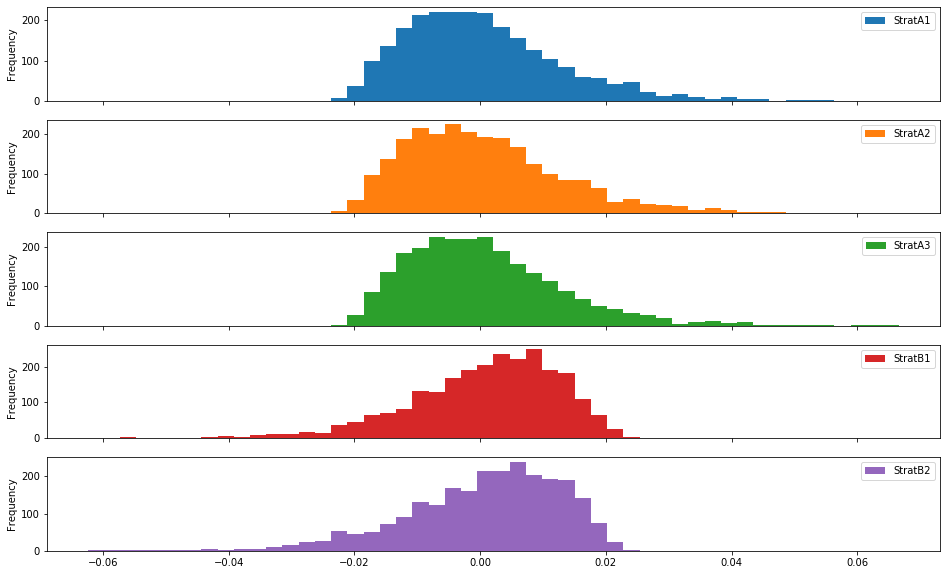

In [16]:
Strategies_A_B.plot(kind="hist", bins=50, subplots=True, figsize=(16,10))

As we commented before, correlation is vital to know when asset or strategy returns go hand in hand in future luck. To benefit from diversification, correlation must be low.

We can calculate the correlation between the returns of the strategies with the whole series

In [17]:
corr = Strategies_A_B.corr()
corr

StratA1   StratA2   StratA3   StratB1   StratB2
StratA1  1.000000  0.002856 -0.025571  0.030596 -0.002940
StratA2  0.002856  1.000000  0.035310 -0.025093  0.020062
StratA3 -0.025571  0.035310  1.000000  0.026725  0.020929
StratB1  0.030596 -0.025093  0.026725  1.000000 -0.011878
StratB2 -0.002940  0.020062  0.020929 -0.011878  1.000000

Or analyze the correlation based on the time horizon we have as an investment

In [18]:
corr = Strategies_A_B[-60:].corr()
corr

StratA1   StratA2   StratA3   StratB1   StratB2
StratA1  1.000000 -0.251070 -0.068042  0.199785  0.128537
StratA2 -0.251070  1.000000 -0.038942 -0.086718 -0.033532
StratA3 -0.068042 -0.038942  1.000000 -0.091949  0.063135
StratB1  0.199785 -0.086718 -0.091949  1.000000 -0.267339
StratB2  0.128537 -0.033532  0.063135 -0.267339  1.000000

The above analyses give us a snapshot at a given time for a given horizon, but the reality is that the correlation varies over time and knowing this allows us to make better estimates.

For example we can see that the correlation is different if we consider a year:

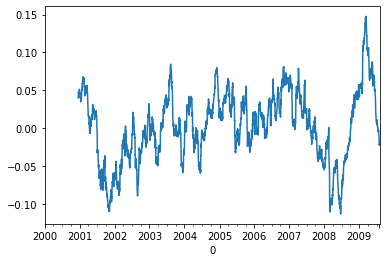

In [19]:
Strategies_A_B['StratA1'].rolling(252).corr(Strategies_A_B['StratA2']).plot()

A quarter's correlation is greater than the annual correlation

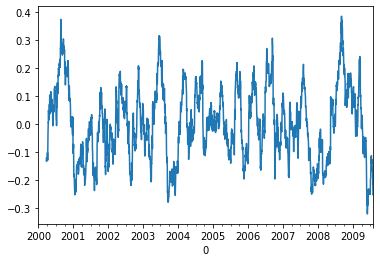

In [20]:
Strategies_A_B['StratA1'].rolling(60).corr(Strategies_A_B['StratA2']).plot()

If we reduce the horizon to two weeks, we see that the correlation is quite high.

Therefore, we see that the correlation is closely related to the analysis horizon.

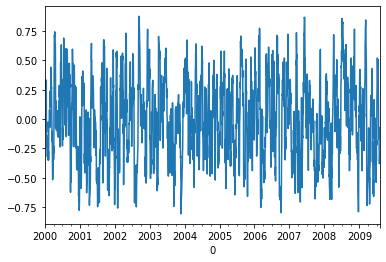

In [21]:
Strategies_A_B['StratA1'].rolling(10).corr(Strategies_A_B['StratA2']).plot()

## Basic performance analysis

Although logically all performance indicators can be calculated by hand, it is worth knowing the pyfolio bookstore that offers us an immense amount of information about the performance of our strategy.

/Users/Mario/opt/anaconda3/envs/EPAT36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


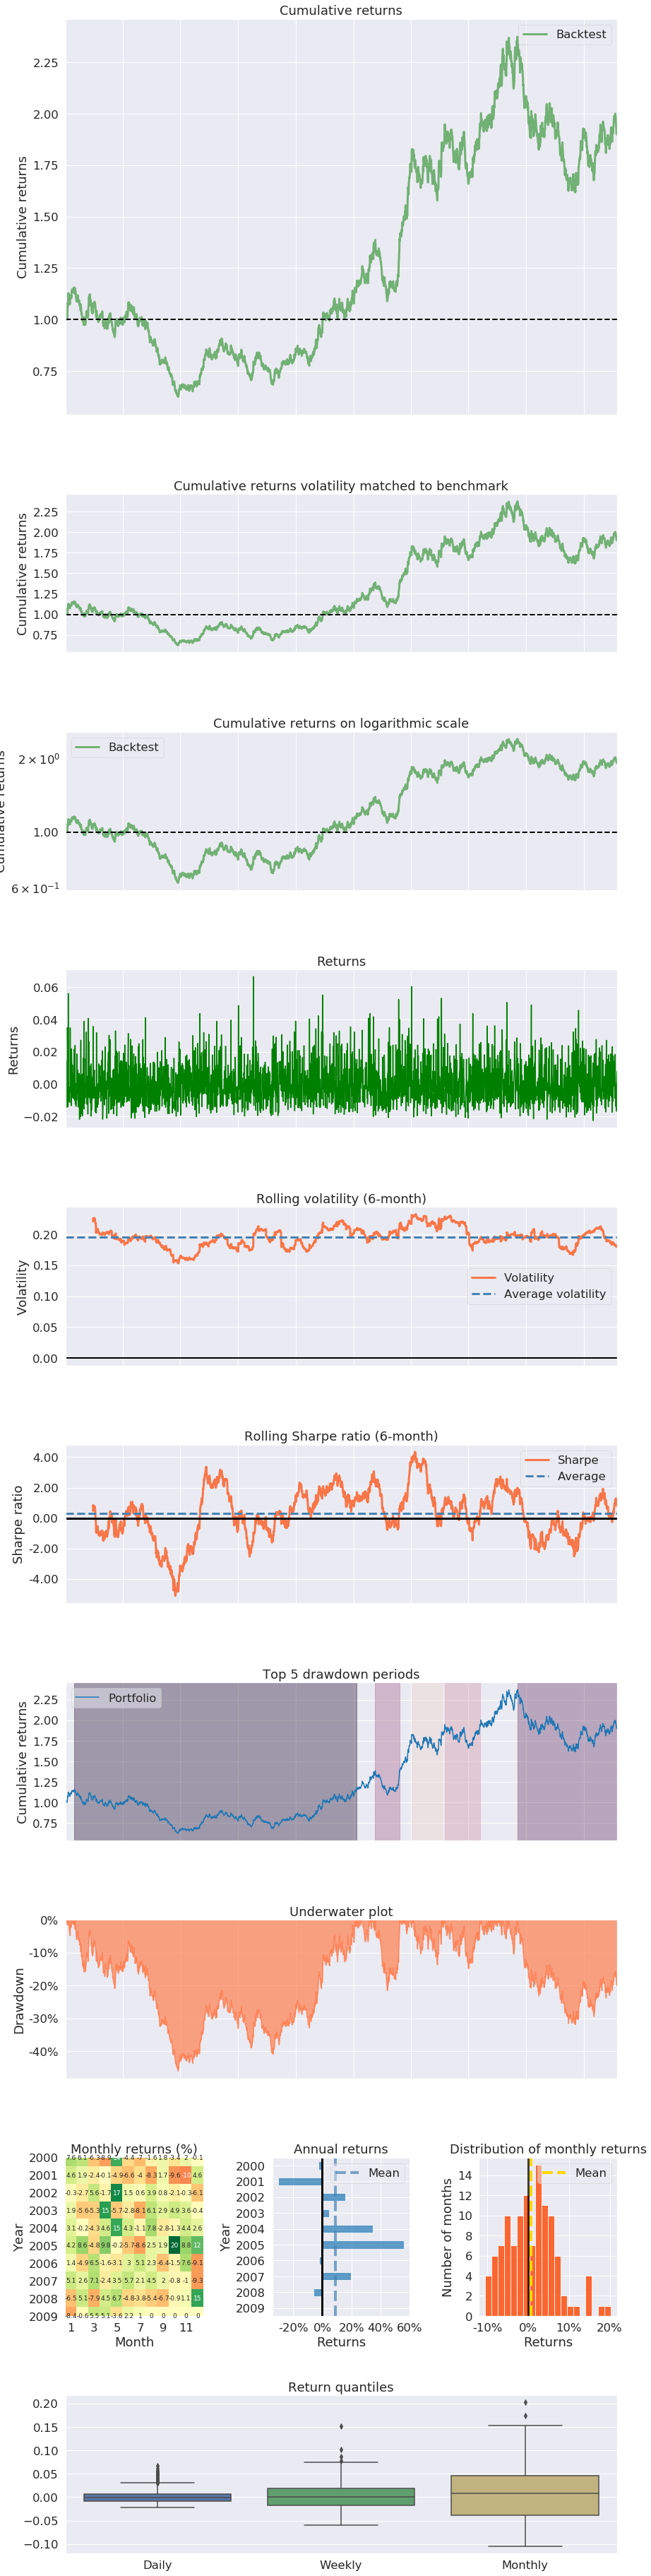

In [22]:
pf.tears.create_returns_tear_sheet(pd.Series(Strategies_A_B['StratA1']))

To understand the information in the report, you can read more in this post: [Performance & risk metrics optimization](https://blog.quantinsti.com/performance-metrics-risk-metrics-optimization/)

## Equal weighted portfolio

As you can suppose, the problem we are dealing with is knowing how to distribute the available capital between each of the strategies that have passed the mandatory robust backtesting.

To know if we are doing well, we need something to compare ourselves with, the becnhmark, and it must have characteristics similar to what we want to compare.

For example, the trend following system should be compared with a strategy of buying and holding a portfolio with the same assets.

Here we are going to create a portfolio whose weights are identical for each of the instruments, not differentiate the type of strategy. It serves as a basis for comparing the balance of weights that we will be testing.

In [23]:
portfolio_total_return = np.sum([0.2, 0.2, 0.2, 0.2, 0.2] * Strategies_A_B, axis=1)

Once the total return of the equally distributed portfolio has been computed, we generate the performance report.

/Users/Mario/opt/anaconda3/envs/EPAT36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


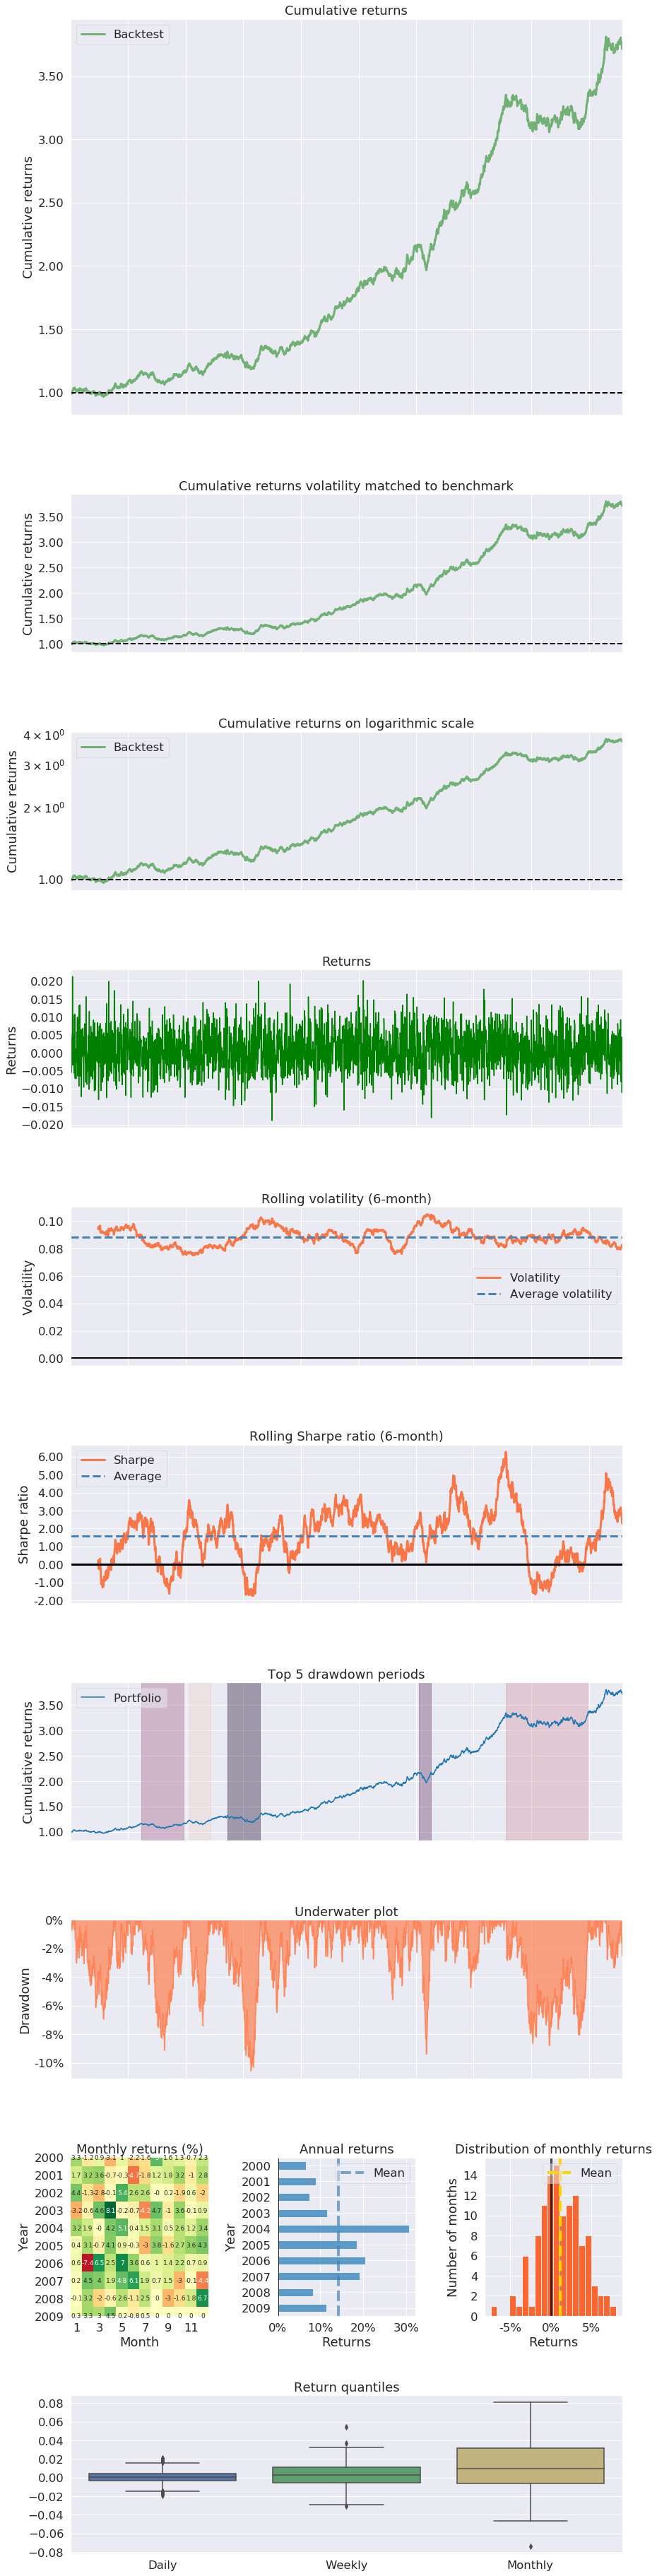

In [24]:
pf.tears.create_returns_tear_sheet(pd.Series(portfolio_total_return))

## Portfolio weights optimized with Kelly criterion

Kelly's criterion is one of the methods available to estimate the weights of our portfolio and maximize the benefit with minimum risk for the analyzed portfolio.

First, we get the number of stocks inside the portoflio.

In [25]:
no_of_stocks = Strategies_A_B.shape[1]
no_of_stocks

5

Compute the varible to get the weights

In [26]:
weights = cp.Variable(no_of_stocks)
weights.shape

(5,)

The portfolio returns are based on the daily return multplied by the wheight for each asset.

In [27]:
portfolio_returns = (np.array(Strategies_A_B)*weights)
portfolio_returns

Expression(AFFINE, UNKNOWN, (2500,))

### Kelly Criterion

The final portfolio value or the utility of the portfolio can be computed using the logarithmic summation of the daily portfolio returns.

In [29]:
final_portfolio_value = cp.sum(cp.log(1+portfolio_returns))
final_portfolio_value

Expression(CONCAVE, UNKNOWN, ())

In [30]:
objective = cp.Maximize(final_portfolio_value)
objective

Maximize(Expression(CONCAVE, UNKNOWN, ()))

In [31]:
constraints = [0.0<=weights, cp.sum(weights)==1]
constraints

[Inequality(Constant(CONSTANT, ZERO, ())),
 Equality(Expression(AFFINE, UNKNOWN, ()), Constant(CONSTANT, NONNEGATIVE, ()))]

Here the constraints specify that the first one is an inequality constraint and its value is a constant zero. While the second is an equality constraint between an affine expression whose value is equal to a constant non-negative value

Now, you can combine both the objective and the constraints to create a problem statement. You can do this by using the Problem class of the cvxpy library, as shown below.

In [32]:
problem = cp.Problem(objective, constraints)
problem

Problem(Maximize(Expression(CONCAVE, UNKNOWN, ())), [Inequality(Constant(CONSTANT, ZERO, ())), Equality(Expression(AFFINE, UNKNOWN, ()), Constant(CONSTANT, NONNEGATIVE, ()))])

In [33]:
# The optimal objective value is returned by `prob.solve()`.
problem.solve()

# The optimal value for w is stored in `w.value`.
print(weights.value)

[2.86865963e-12 2.26342494e-11 3.30438909e-01 3.81809412e-01
 2.87751679e-01]


/Users/Mario/opt/anaconda3/envs/EPAT36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


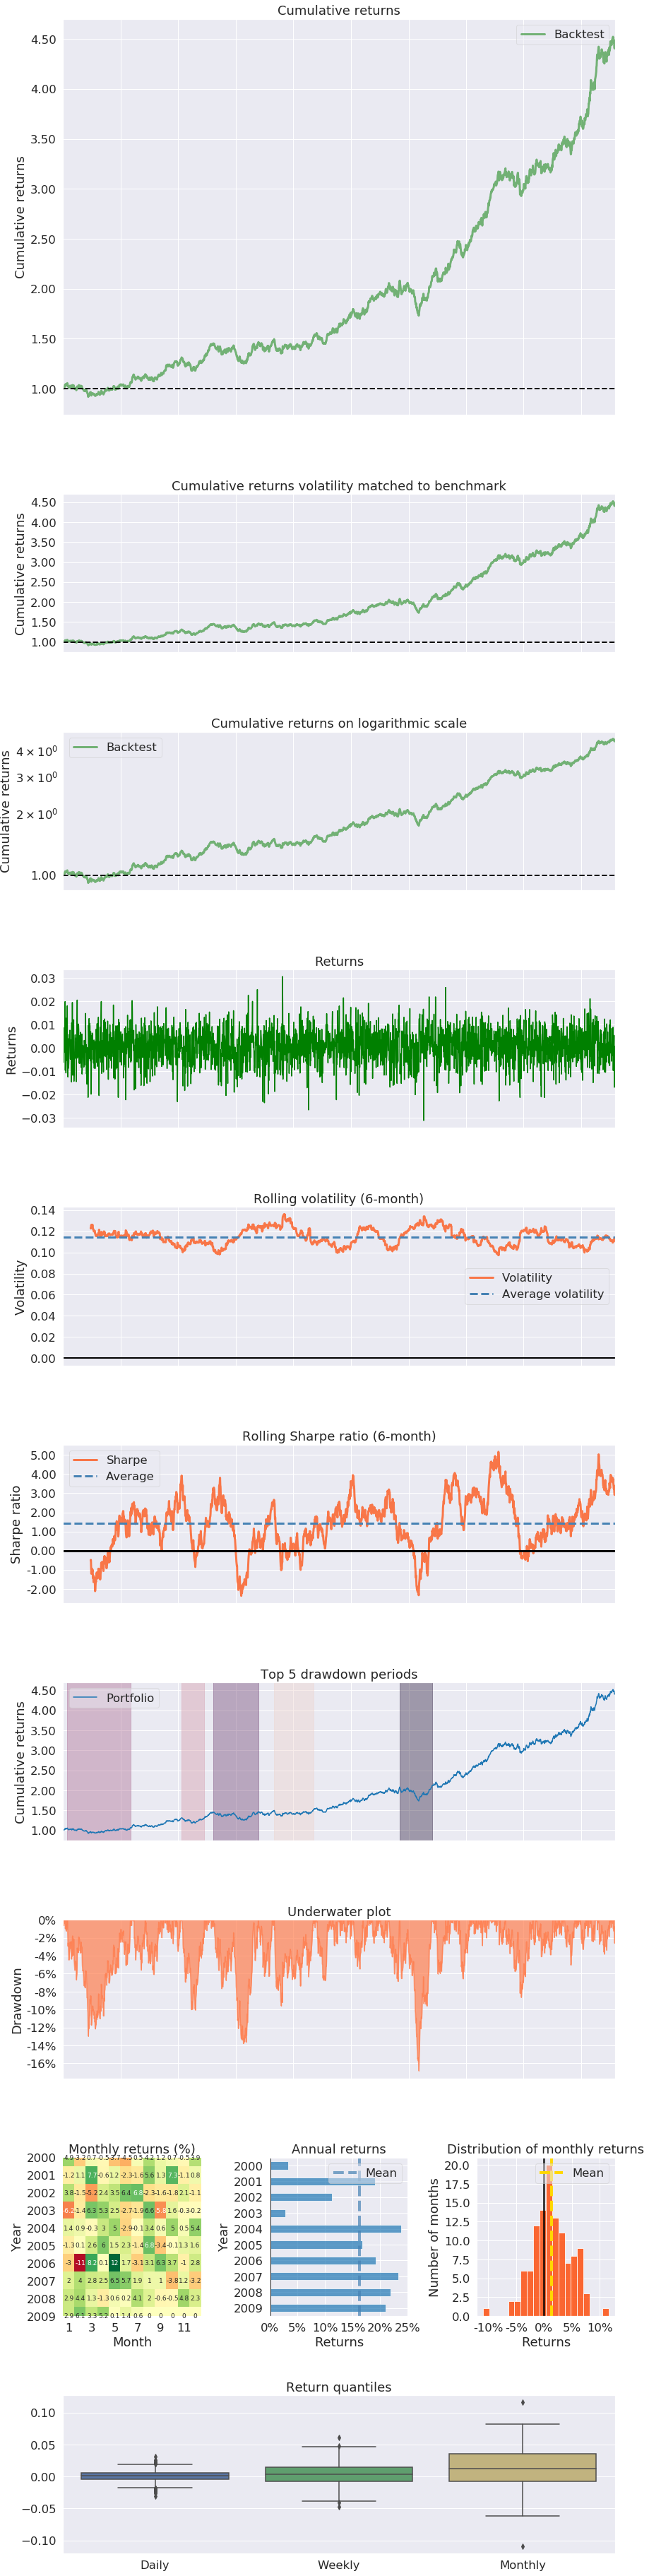

In [34]:
portfolio_total_return_kelly = np.sum(weights.value * Strategies_A_B, axis=1)
pf.tears.create_returns_tear_sheet(portfolio_total_return_kelly)

## Kelly Strategy A

We are going to repeat the same exercise for the two strategies in an individualized way, in this way we want to know which weights we should assign to each one of the assets of a strategy.

[9.01444775e-12 1.44402270e-01 8.55597730e-01]


/Users/Mario/opt/anaconda3/envs/EPAT36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


/Users/Mario/opt/anaconda3/envs/EPAT36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


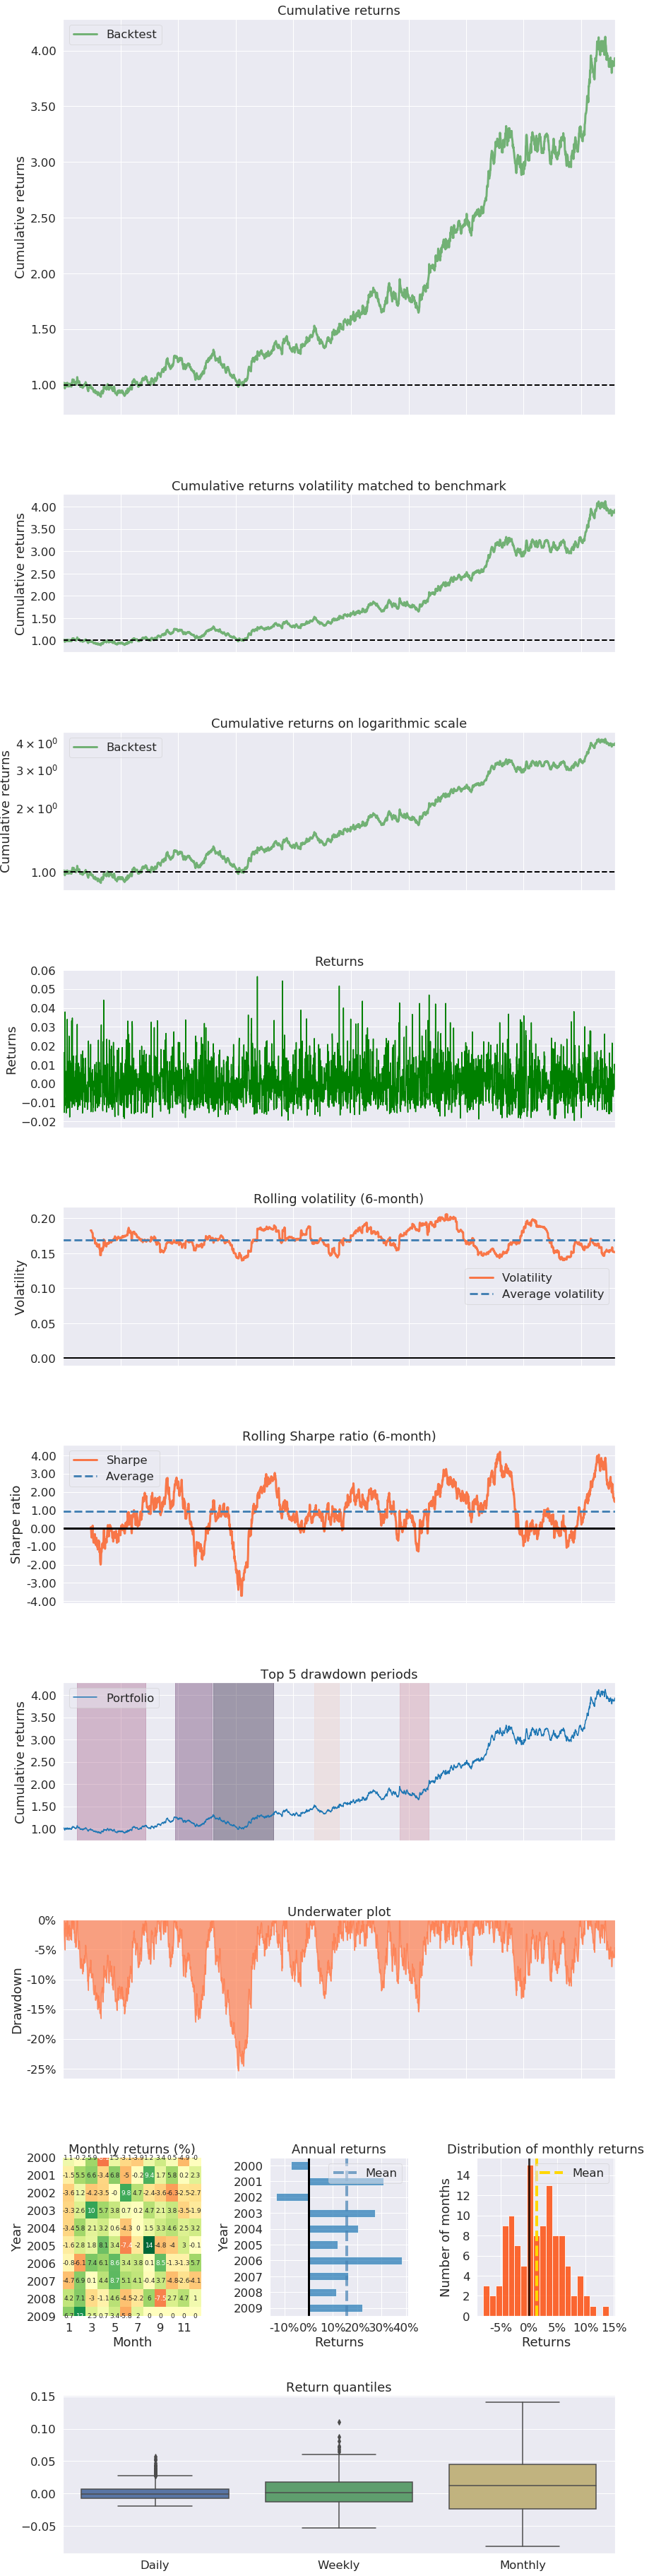

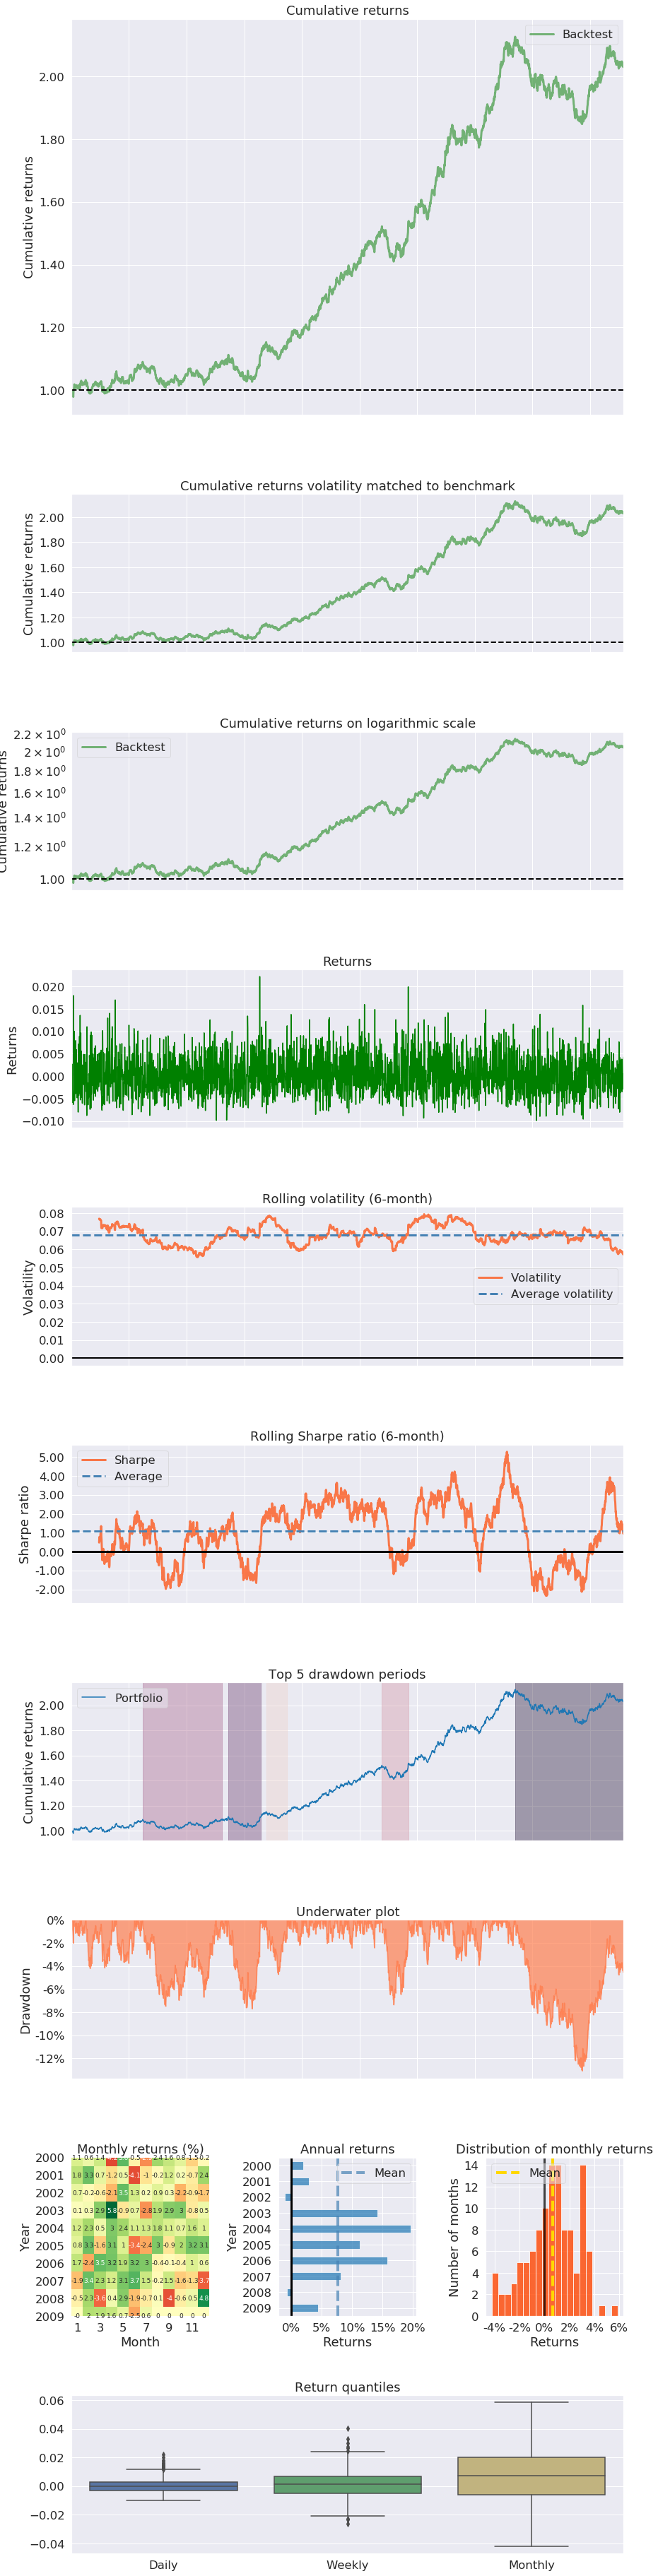

In [35]:
no_of_stocks = Strategy_A.shape[1]
no_of_stocks
weights = cp.Variable(no_of_stocks)
weights.shape
(np.array(Strategy_A)*weights)
# Save the portfolio returns in a variable
portfolio_returns = (np.array(Strategy_A)*weights)
portfolio_returns
final_portfolio_value = cp.sum(cp.log(1+portfolio_returns))
final_portfolio_value
objective = cp.Maximize(final_portfolio_value)
objective
constraints = [0.0<=weights, cp.sum(weights)==1]
constraints
problem = cp.Problem(objective, constraints)
problem
# The optimal objective value is returned by `prob.solve()`.
problem.solve()

# The optimal value for w is stored in `w.value`.
print(weights.value)

kelly_portfolio_returnsA = ((Strategy_A)*(weights.value)).sum(axis=1)
kelly_portfolio_returnsA.head()
kelly_portfolio_value = (1+(kelly_portfolio_returnsA)).cumprod()
kelly_portfolio_value.head()
kelly_annualized_returnsA = (
    (kelly_portfolio_value[-1])**(252/len(Strategy_A)))-1

# Print the annualized returns of the Kelly portfolio
kelly_annualized_returnsA

portfolio_total_return_kellyA = np.sum(weights.value * Strategy_A, axis=1)
pf.tears.create_returns_tear_sheet(portfolio_total_return_kellyA)

portfolio_total_return_equal = np.sum([0.2, 0.2, 0.2] * Strategy_A, axis=1)
pf.tears.create_returns_tear_sheet(portfolio_total_return_equal)


## Kelly Strategy B

The same for assets in strategy B

[0.55188147 0.44811853]


/Users/Mario/opt/anaconda3/envs/EPAT36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


/Users/Mario/opt/anaconda3/envs/EPAT36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


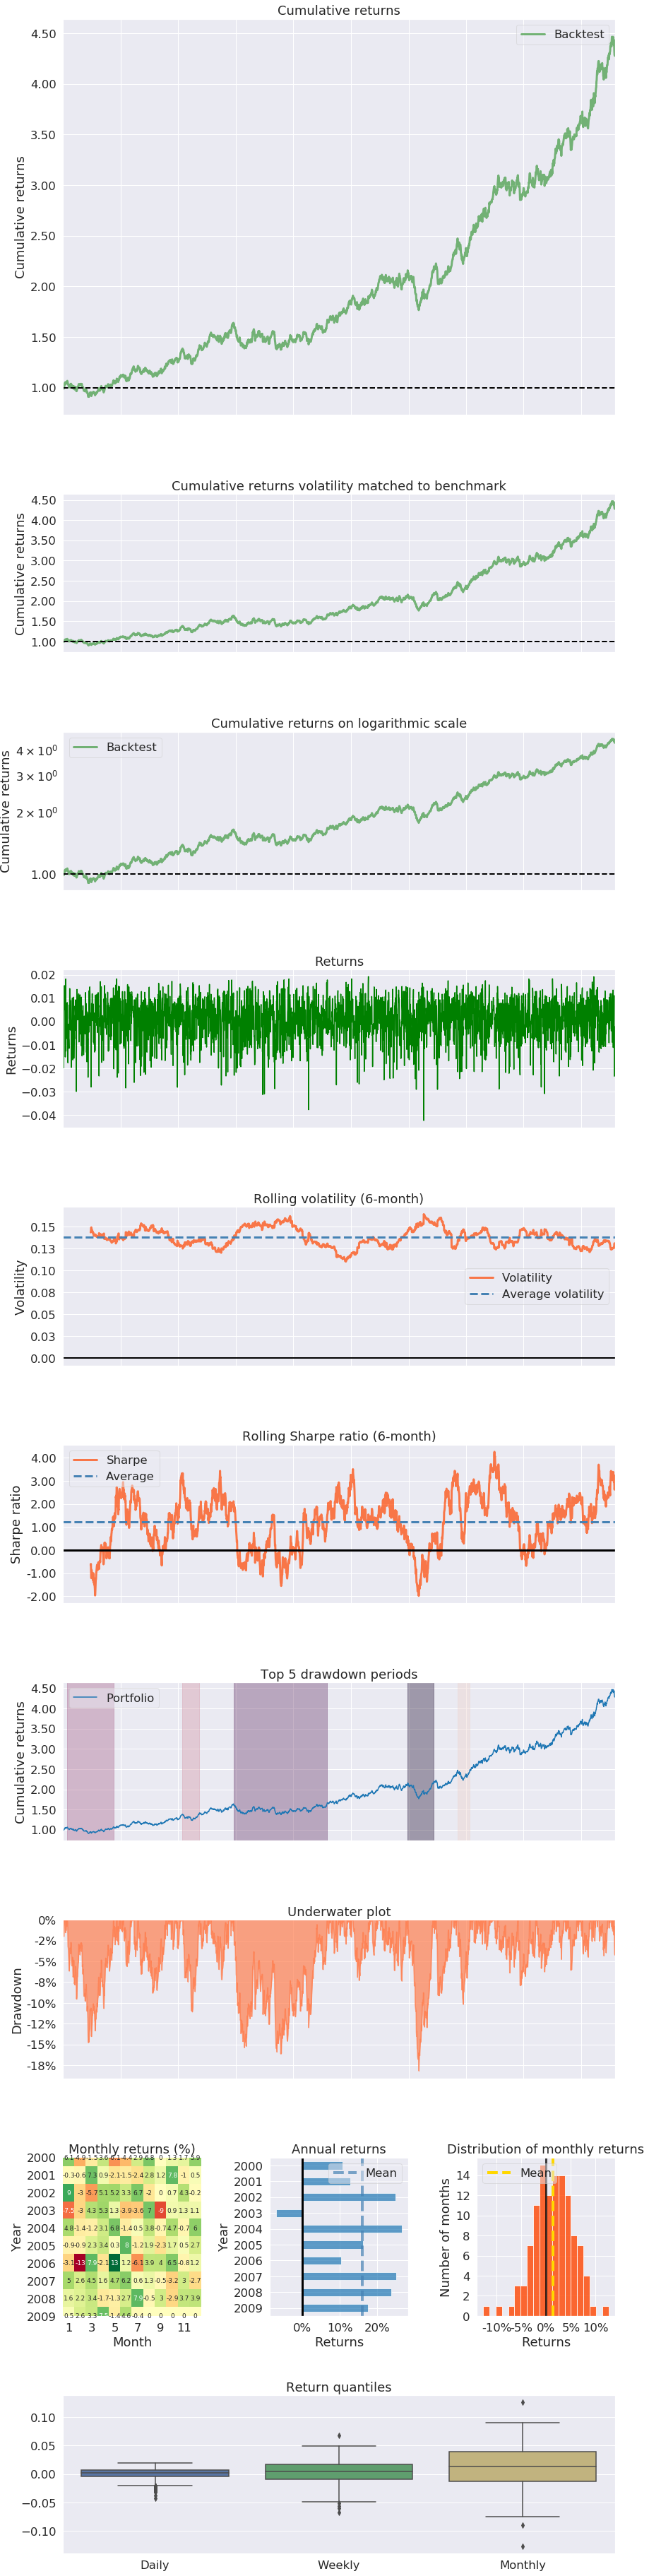

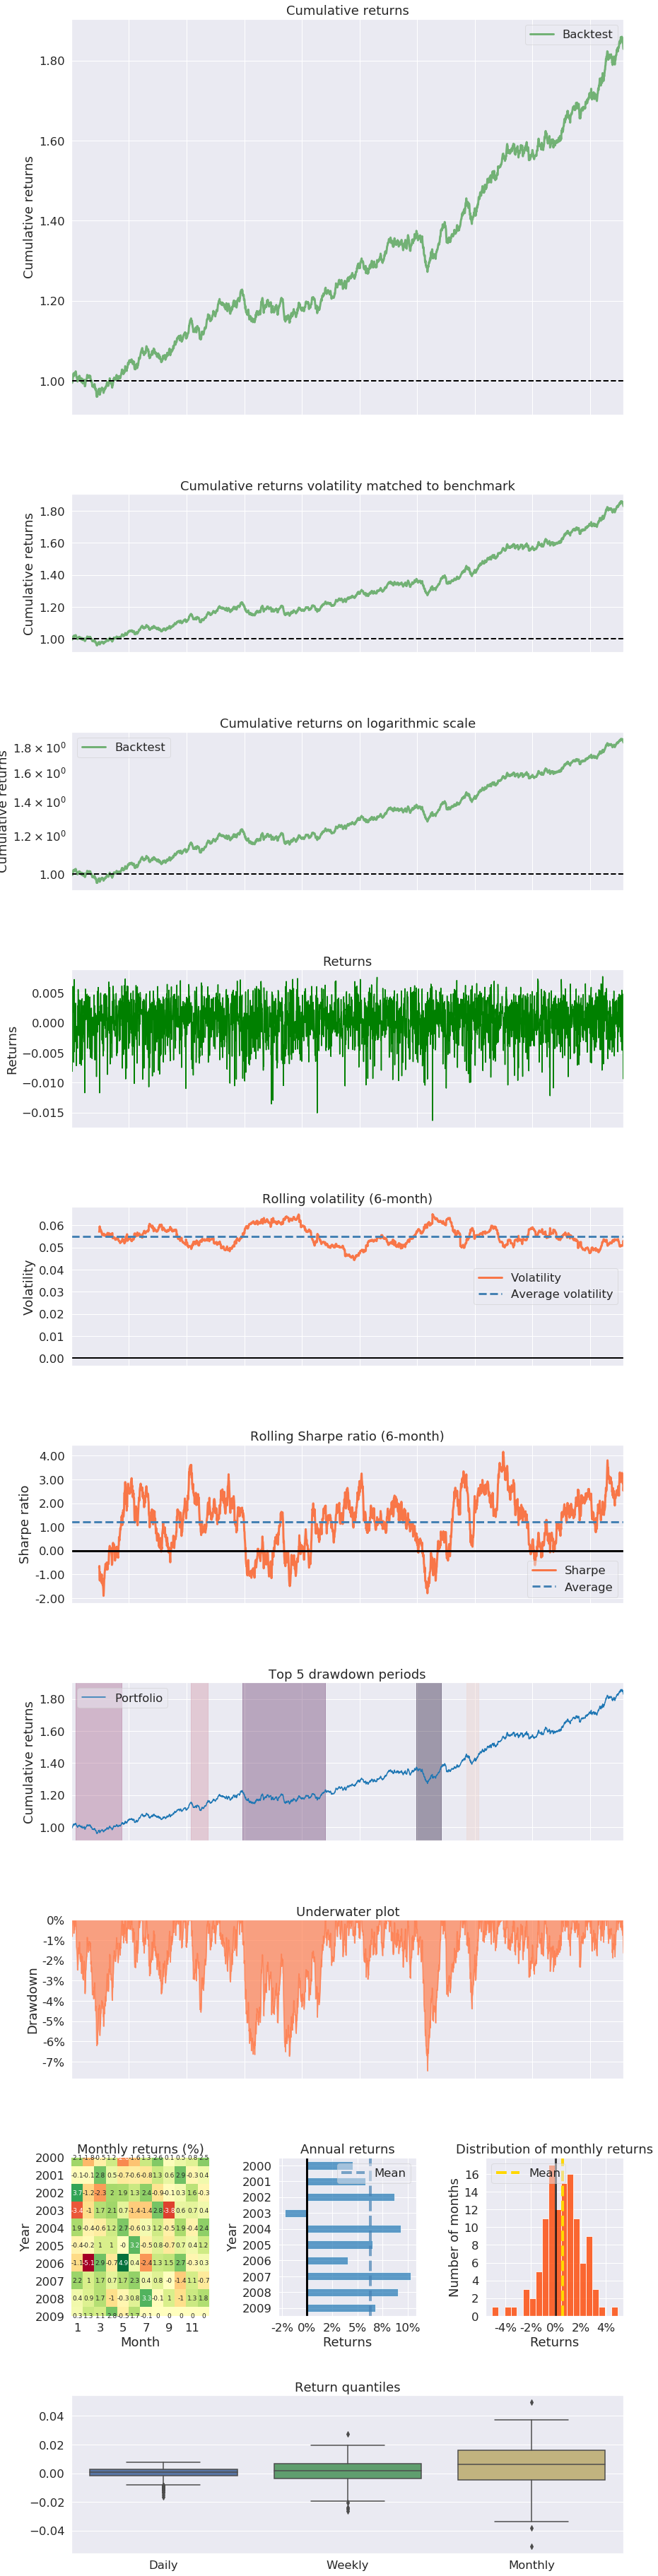

In [36]:
no_of_stocks = Strategy_B.shape[1]
no_of_stocks
weights = cp.Variable(no_of_stocks)
weights.shape
(np.array(Strategy_B)*weights)
# Save the portfolio returns in a variable
portfolio_returns = (np.array(Strategy_B)*weights)
portfolio_returns
final_portfolio_value = cp.sum(cp.log(1+portfolio_returns))
final_portfolio_value
objective = cp.Maximize(final_portfolio_value)
objective
constraints = [0.0<=weights, cp.sum(weights)==1]
constraints
problem = cp.Problem(objective, constraints)
problem
# The optimal objective value is returned by `prob.solve()`.
problem.solve()

# The optimal value for w is stored in `w.value`.
print(weights.value)

kelly_portfolio_returnsB = ((Strategy_B)*(weights.value)).sum(axis=1)
kelly_portfolio_returnsB.head()
kelly_portfolio_value = (1+(kelly_portfolio_returnsB)).cumprod()
kelly_portfolio_value.head()
kelly_annualized_returnsB = (
    (kelly_portfolio_value[-1])**(252/len(Strategy_B)))-1

# Print the annualized returns of the Kelly portfolio
kelly_annualized_returnsB

portfolio_total_return_kellyB = np.sum(weights.value * Strategy_B, axis=1)
pf.tears.create_returns_tear_sheet(portfolio_total_return_kellyB)

portfolio_total_return_equal = np.sum([0.2, 0.2] * Strategy_B, axis=1)
pf.tears.create_returns_tear_sheet(portfolio_total_return_equal)



## Kelly Strategy A & B

Now that we have the optimized weights for each strategy independently, we are going to optimize the weights that we will assign to each strategy.

[0.31516003 0.68483997]


/Users/Mario/opt/anaconda3/envs/EPAT36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


/Users/Mario/opt/anaconda3/envs/EPAT36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


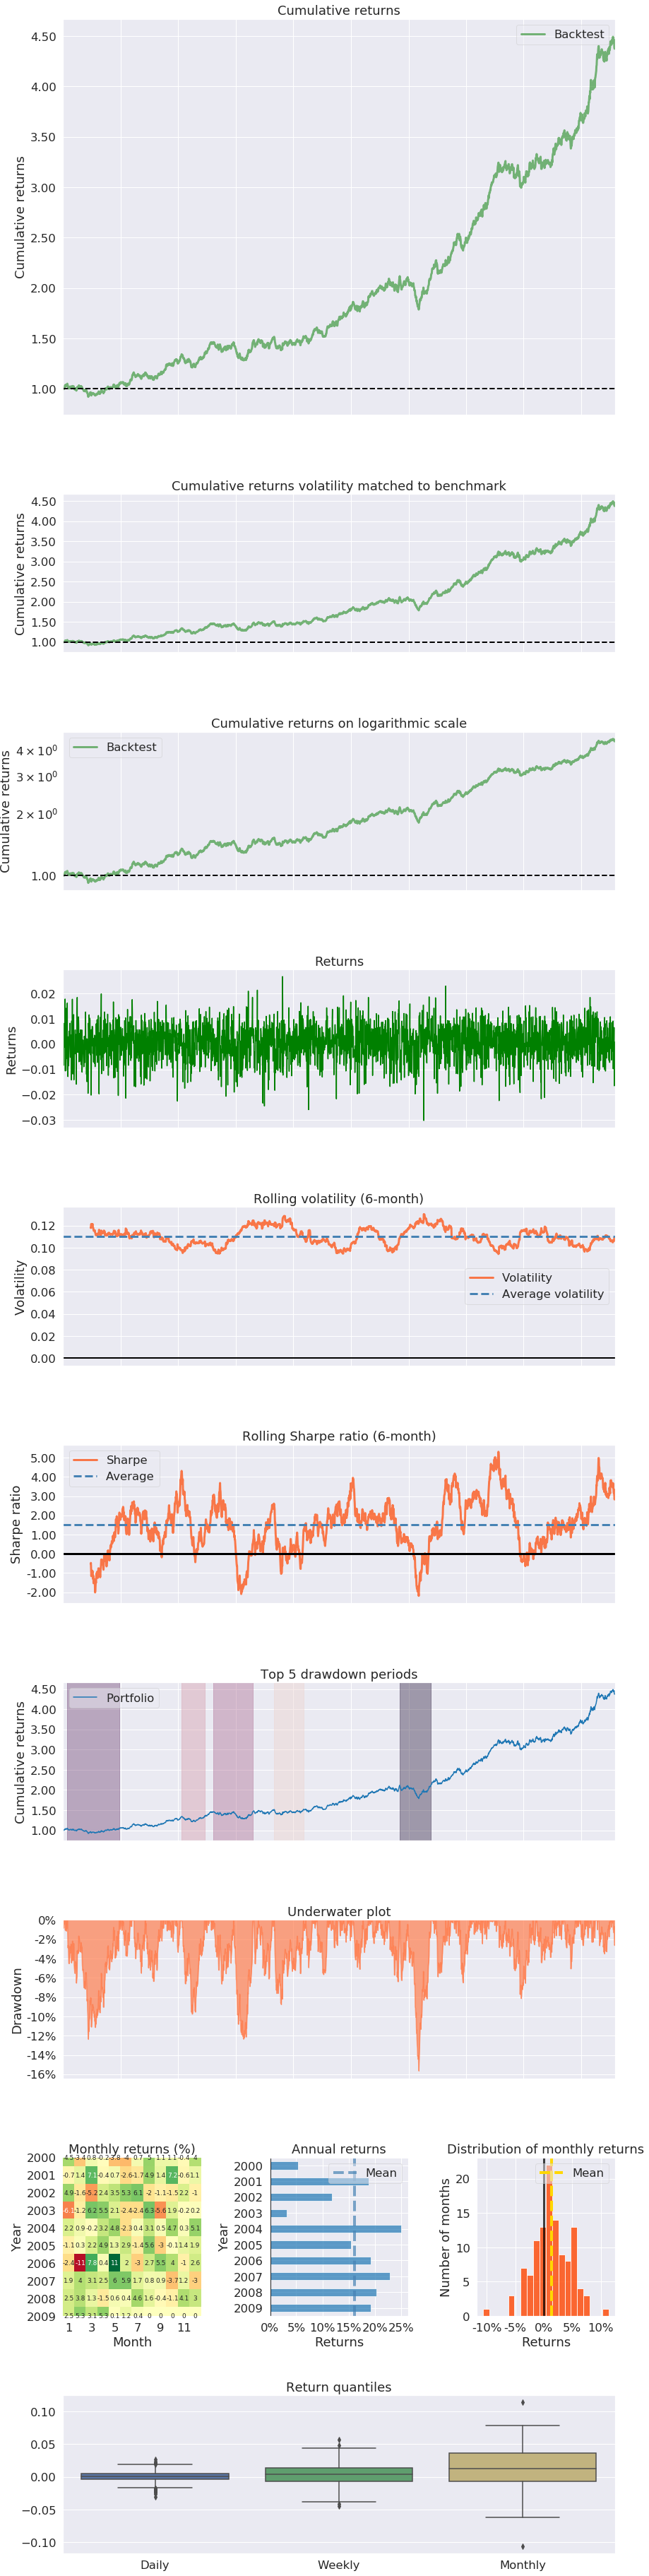

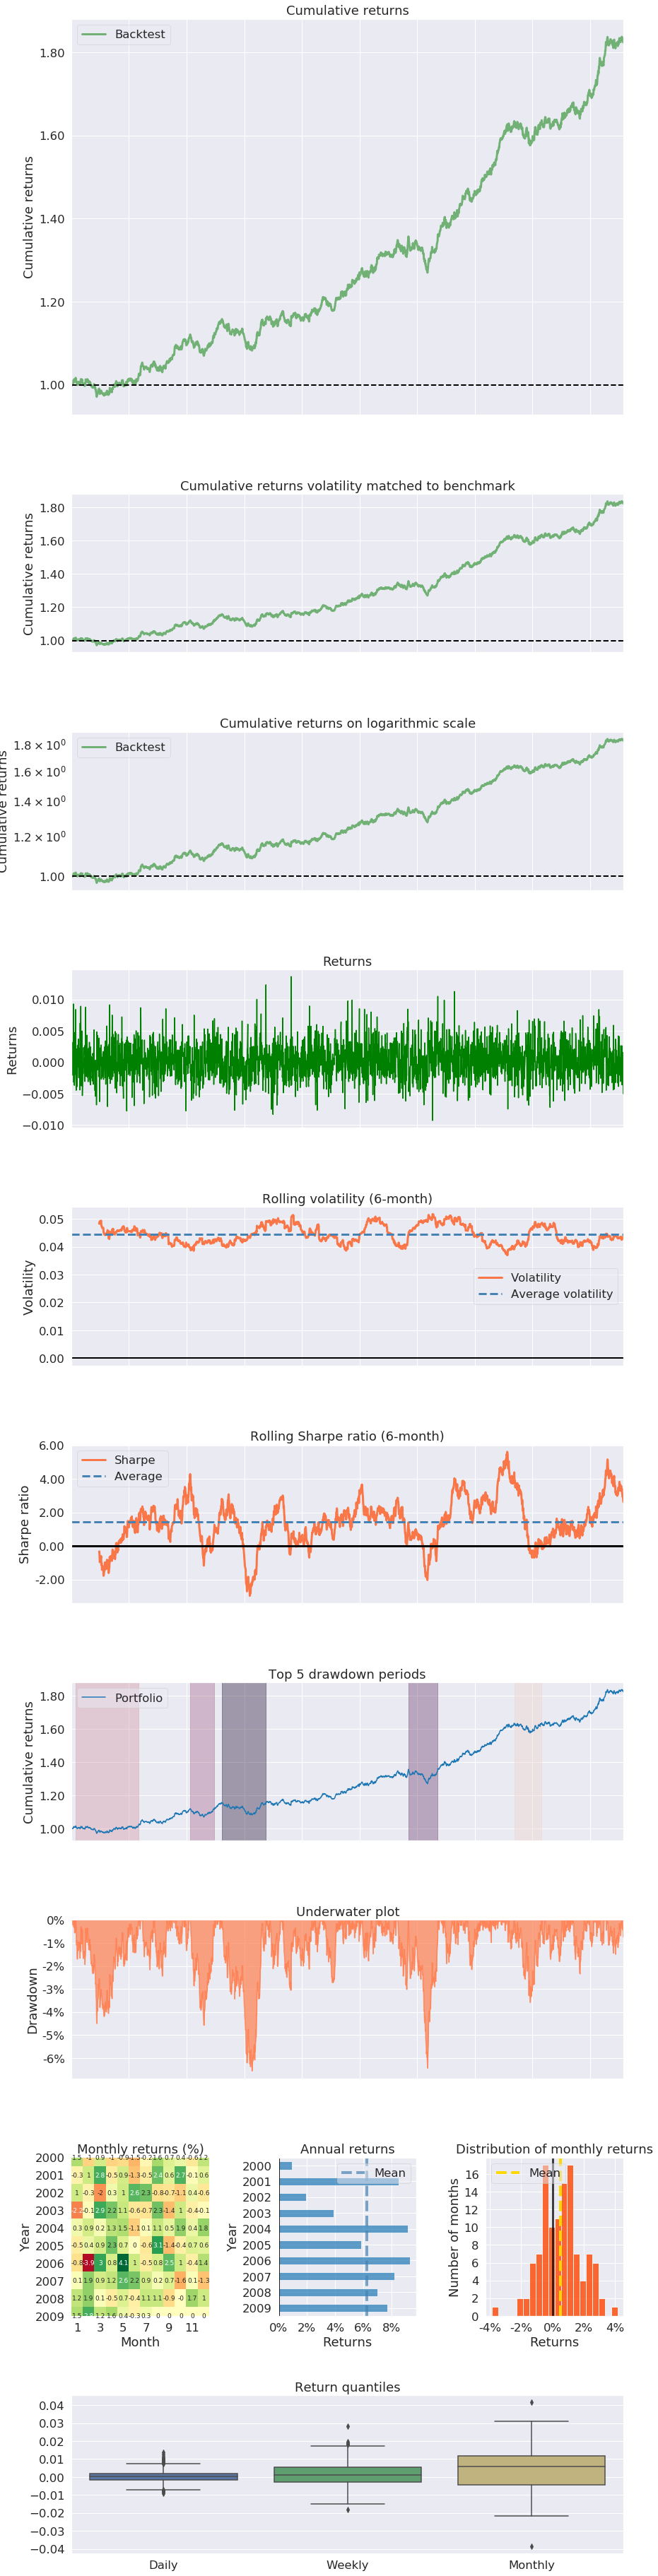

In [37]:
kelly_portfolio_returnsA_=kelly_portfolio_returnsA.to_frame()
kelly_portfolio_returnsB_=kelly_portfolio_returnsB.to_frame()
Kelly_Strat_A_B = pd.concat([kelly_portfolio_returnsA_, kelly_portfolio_returnsB_], axis=1, ignore_index=False)

no_of_stocks = Kelly_Strat_A_B.shape[1]
no_of_stocks
weights = cp.Variable(no_of_stocks)
weights.shape
(np.array(Kelly_Strat_A_B)*weights)
# Save the portfolio returns in a variable
portfolio_returns = (np.array(Kelly_Strat_A_B)*weights)
portfolio_returns
final_portfolio_value = cp.sum(cp.log(1+portfolio_returns))
final_portfolio_value
objective = cp.Maximize(final_portfolio_value)
objective
constraints = [0.0<=weights, cp.sum(weights)==1]
constraints
problem = cp.Problem(objective, constraints)
problem
# The optimal objective value is returned by `prob.solve()`.
problem.solve()

# The optimal value for w is stored in `w.value`.
print(weights.value)

kelly_portfolio_returnsAB = ((Kelly_Strat_A_B)*(weights.value)).sum(axis=1)
kelly_portfolio_returnsAB.head()
kelly_portfolio_value = (1+(kelly_portfolio_returnsAB)).cumprod()
kelly_portfolio_value.head()
kelly_annualized_returnsAB = (
    (kelly_portfolio_value[-1])**(252/len(Kelly_Strat_A_B)))-1

# Print the annualized returns of the Kelly portfolio
kelly_annualized_returnsB

portfolio_total_return_kellyAB = np.sum(weights.value * Kelly_Strat_A_B, axis=1)
pf.tears.create_returns_tear_sheet(portfolio_total_return_kellyAB)

portfolio_total_return_equal = np.sum([0.2, 0.2] * Kelly_Strat_A_B, axis=1)
pf.tears.create_returns_tear_sheet(portfolio_total_return_equal)



## The Efficient Frontier: Markowitz Portfolio Optimization

We can repeat the same exercise using the efficient border proposed by Markowitz. His method is based on maximizing the Sharpe ratio of a portfolio given the mean, standard deviation and correlations. However, since the method assumes the same volatility and return for each strategy, the weights it offers are more extreme than Kelly's.

Read the following post and webinar for a complete explanation [Multi-Strategy Portfolios: Combining Quantitative Strategies Effectively](Multi-Strategy Portfolios: Combining Quantitative Strategies Effectively)

In [38]:
# from https://blog.quantopian.com/markowitz-portfolio-optimization-2/
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio , annualized
    '''

    p = np.asmatrix(np.mean(returns, axis=1)) * 252
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns)) * 252
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2*252:
        return random_portfolio(returns)
    return mu, sigma

In [39]:
return_vec = Strategies_A_B.dropna().values.T
return_vec

array([[-0.00872847,  0.00534103,  0.00878715, ..., -0.01673404,
        -0.00019485,  0.00782185],
       [-0.01057317, -0.01513291, -0.00812359, ...,  0.01209889,
        -0.00709882,  0.00598517],
       [-0.01510529,  0.01052043,  0.01284208, ..., -0.00393756,
         0.0132259 ,  0.00747738],
       [ 0.00565327,  0.0127793 ,  0.00224137, ..., -0.02329796,
        -0.00617411, -0.01552813],
       [-0.00556354, -0.00971479,  0.01114585, ..., -0.02351012,
        -0.01391839,  0.01410978]])

In [40]:
n_portfolios = 10000
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])

Text(0.5, 1.0, 'Mean and standard deviation of returns of random Strategy generated portfolios')

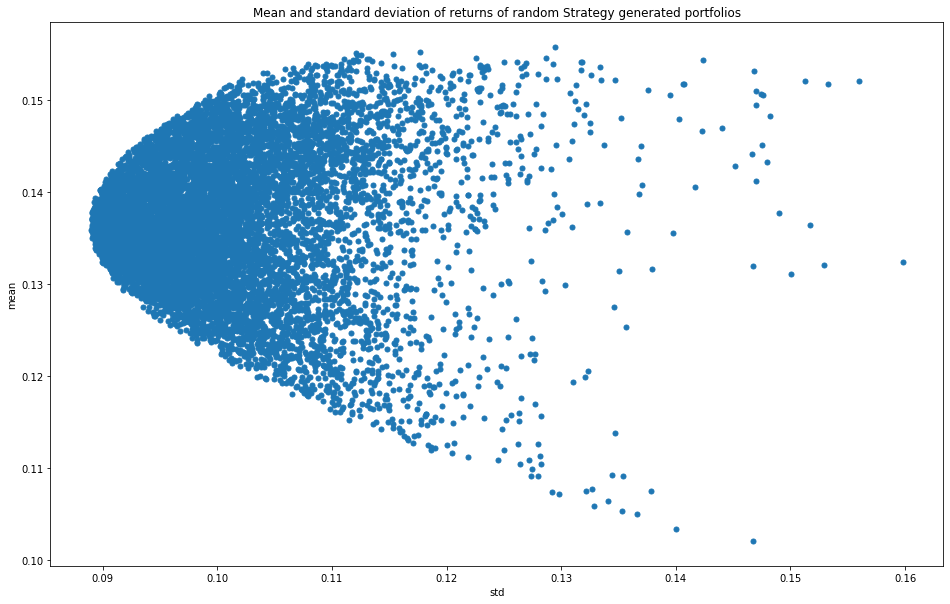

In [41]:
plt.figure(figsize=(16, 10))
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of random Strategy generated portfolios')

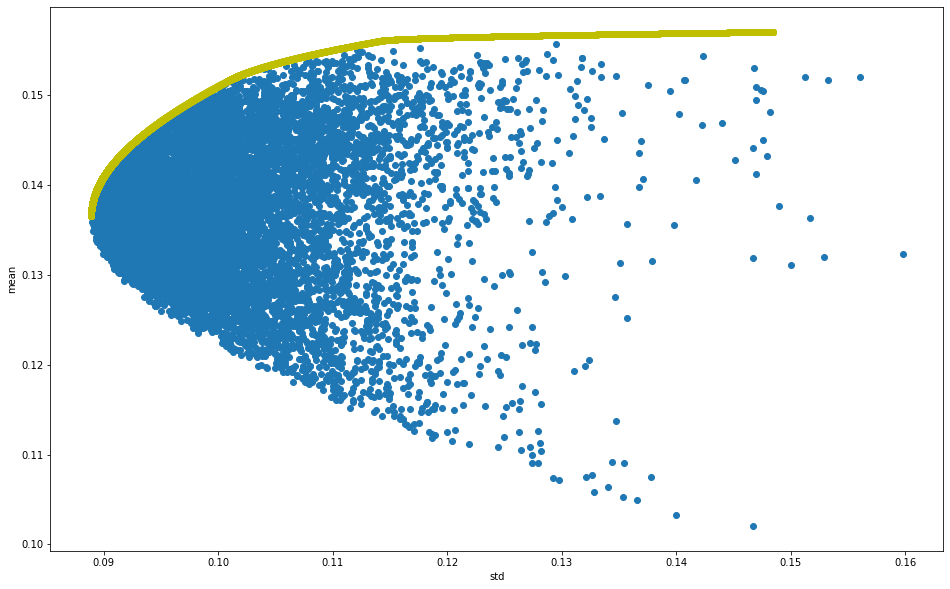

In [42]:
# Turn off progress printing 
solvers.options['show_progress'] = False

def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 10000
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.asmatrix(np.cov(returns)*252))
    pbar = opt.matrix(np.asmatrix(np.mean(returns, axis=1)*252))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)

plt.figure(figsize=(16, 10))
plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

In [43]:
import scipy.interpolate as sci
import scipy.optimize as sciopt

def getListOfUniqueWithinPrecision(sortedArray):
    ind = 0
    currentVal = 0
    diffToIgnore = 0.00000001
    listOfIndices = [];
    for i in range(sortedArray.size):
        if(sortedArray[i] - diffToIgnore > currentVal):
            listOfIndices.append(i);
            currentVal = sortedArray[i];
    return listOfIndices;

In [44]:
twoRowsArrayForSorting = np.vstack([returns, risks]).T;
rowsAfterSorting = twoRowsArrayForSorting[twoRowsArrayForSorting[:,0].argsort()].T
returnsSorted = rowsAfterSorting[0,:];
risksSorted = rowsAfterSorting[1,:];
listOfInd = getListOfUniqueWithinPrecision(risksSorted);
risksSorted  = risksSorted[listOfInd];
returnsSorted  = returnsSorted[listOfInd];
ind = np.argmin(risksSorted)
evols = risksSorted[ind:]
erets = returnsSorted[ind:]
tck = sci.splrep(evols, erets)

In [45]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

def equations(p, rf=0.0091):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

opt = sciopt.fsolve(equations, [0.0091, 0.5, 0.05])

opt

array([0.0091    , 1.46796828, 0.09103233])

In [46]:
np.round(equations(opt), 5)

array([ 0., -0.,  0.])

Text(0.5, 1.0, 'Portfolio Efficent Frontier with Capital Market Line, RF= 0.91%')

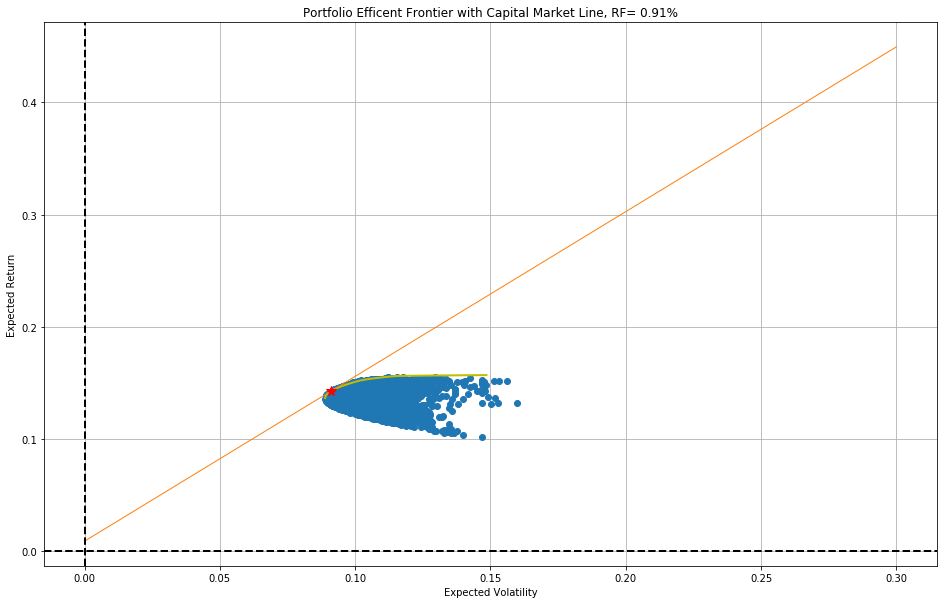

In [47]:
plt.figure(figsize=(16, 10))
plt.plot(stds, means, 'o')
            # random portfolio composition
plt.plot(evols, erets, 'y', lw=2.0)
            # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.0)
            # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=11.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title("Portfolio Efficent Frontier with Capital Market Line, RF= 0.91%")

In [48]:
weights = pd.DataFrame(weights, index=Strategies_A_B.columns)*100
weights.columns=["Percent"]
round(weights, 2)

Percent
StratA1     0.00
StratA2     0.00
StratA3    33.61
StratB1    61.64
StratB2     4.75

In [49]:
Strategies_A_B.mean()/Strategies_A_B.std()

StratA1    0.027136
StratA2    0.041616
StratA3    0.050491
StratB1    0.051360
StratB2    0.049068
dtype: float64

In [50]:
Strategies_A_B=Strategies_A_B.dropna()
Strategies_A_B.head()
#Strategy_A = pf.utils.get_symbol_rets('FB')

StratA1   StratA2   StratA3   StratB1   StratB2
0                                                           
2000-01-03 -0.008728 -0.010573 -0.015105  0.005653 -0.005564
2000-01-04  0.005341 -0.015133  0.010520  0.012779 -0.009715
2000-01-05  0.008787 -0.008124  0.012842  0.002241  0.011146
2000-01-06  0.001824 -0.010051  0.020870 -0.015176 -0.025415
2000-01-07 -0.002013  0.001854 -0.011314  0.009235  0.015770

In [51]:
portfolio_total_return = (0.2 * Strategies_A_B['StratA1']) + (0.2 * Strategies_A_B['StratA2']) + (0.2 * Strategies_A_B['StratA3']) + (0.2 * Strategies_A_B['StratB1']) + (0.2 * Strategies_A_B['StratB2'])

/Users/Mario/opt/anaconda3/envs/EPAT36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


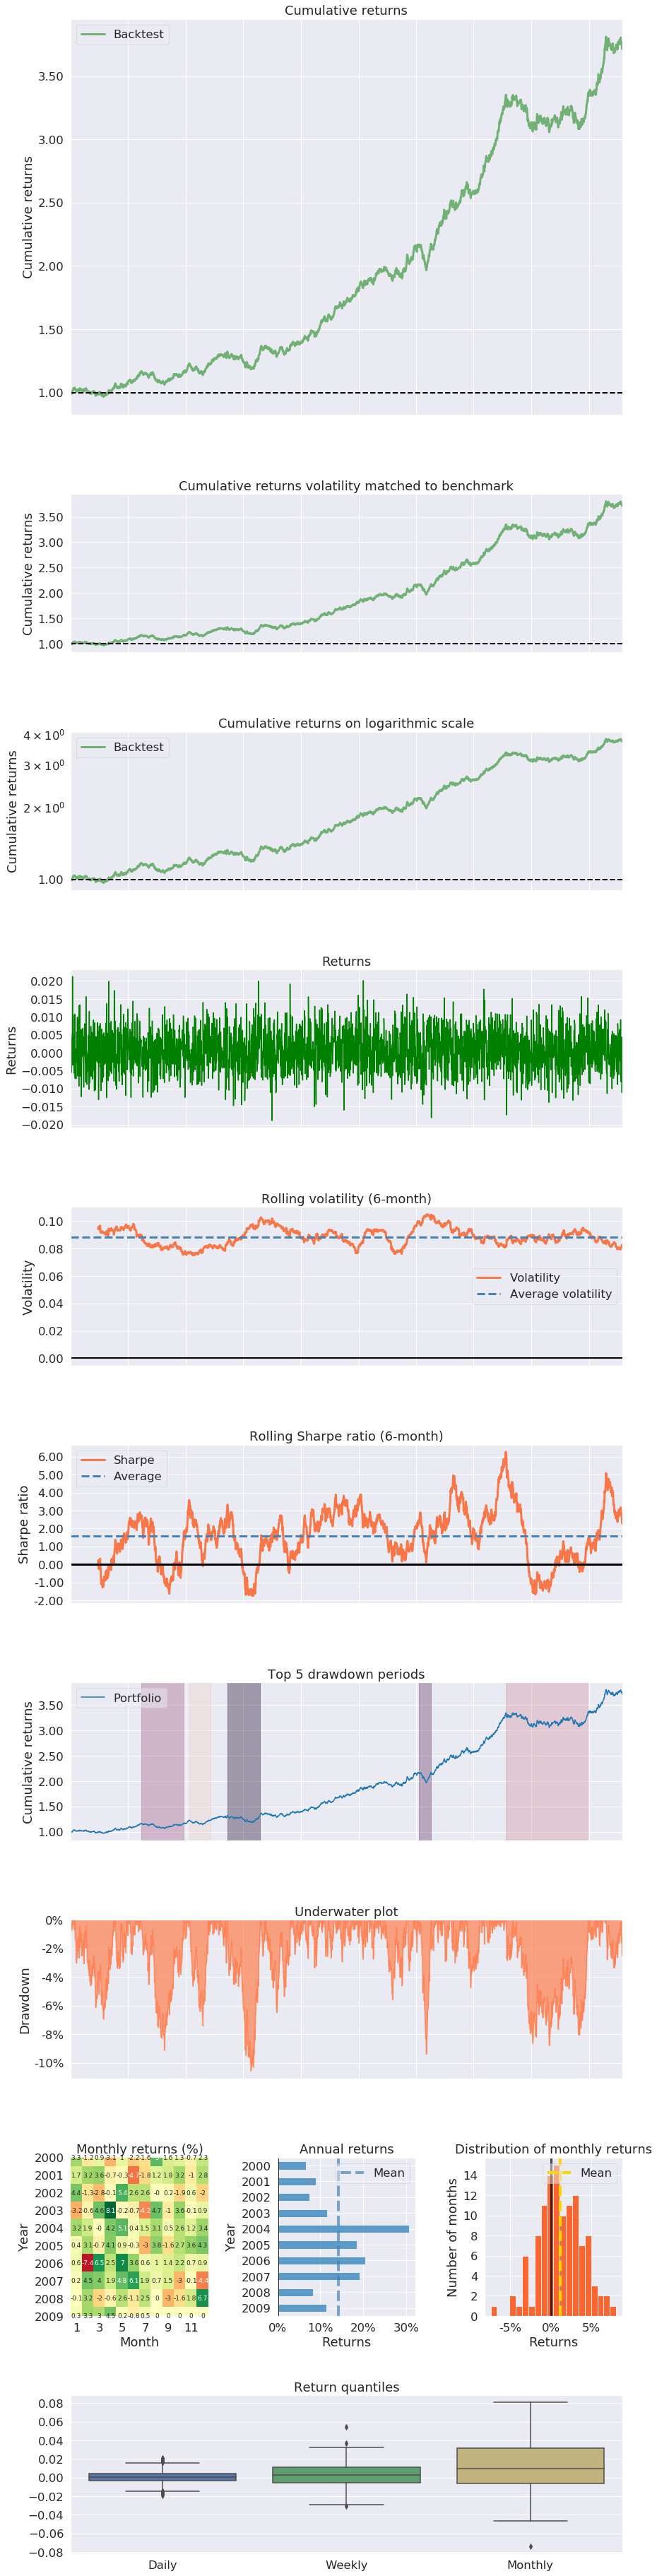

In [52]:
pf.tears.create_returns_tear_sheet(portfolio_total_return)

In [53]:
portfolio_total_return2 = np.sum([0.2, 0.2, 0.2, 0.2, 0.2] * Strategies_A_B, axis=1)

/Users/Mario/opt/anaconda3/envs/EPAT36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


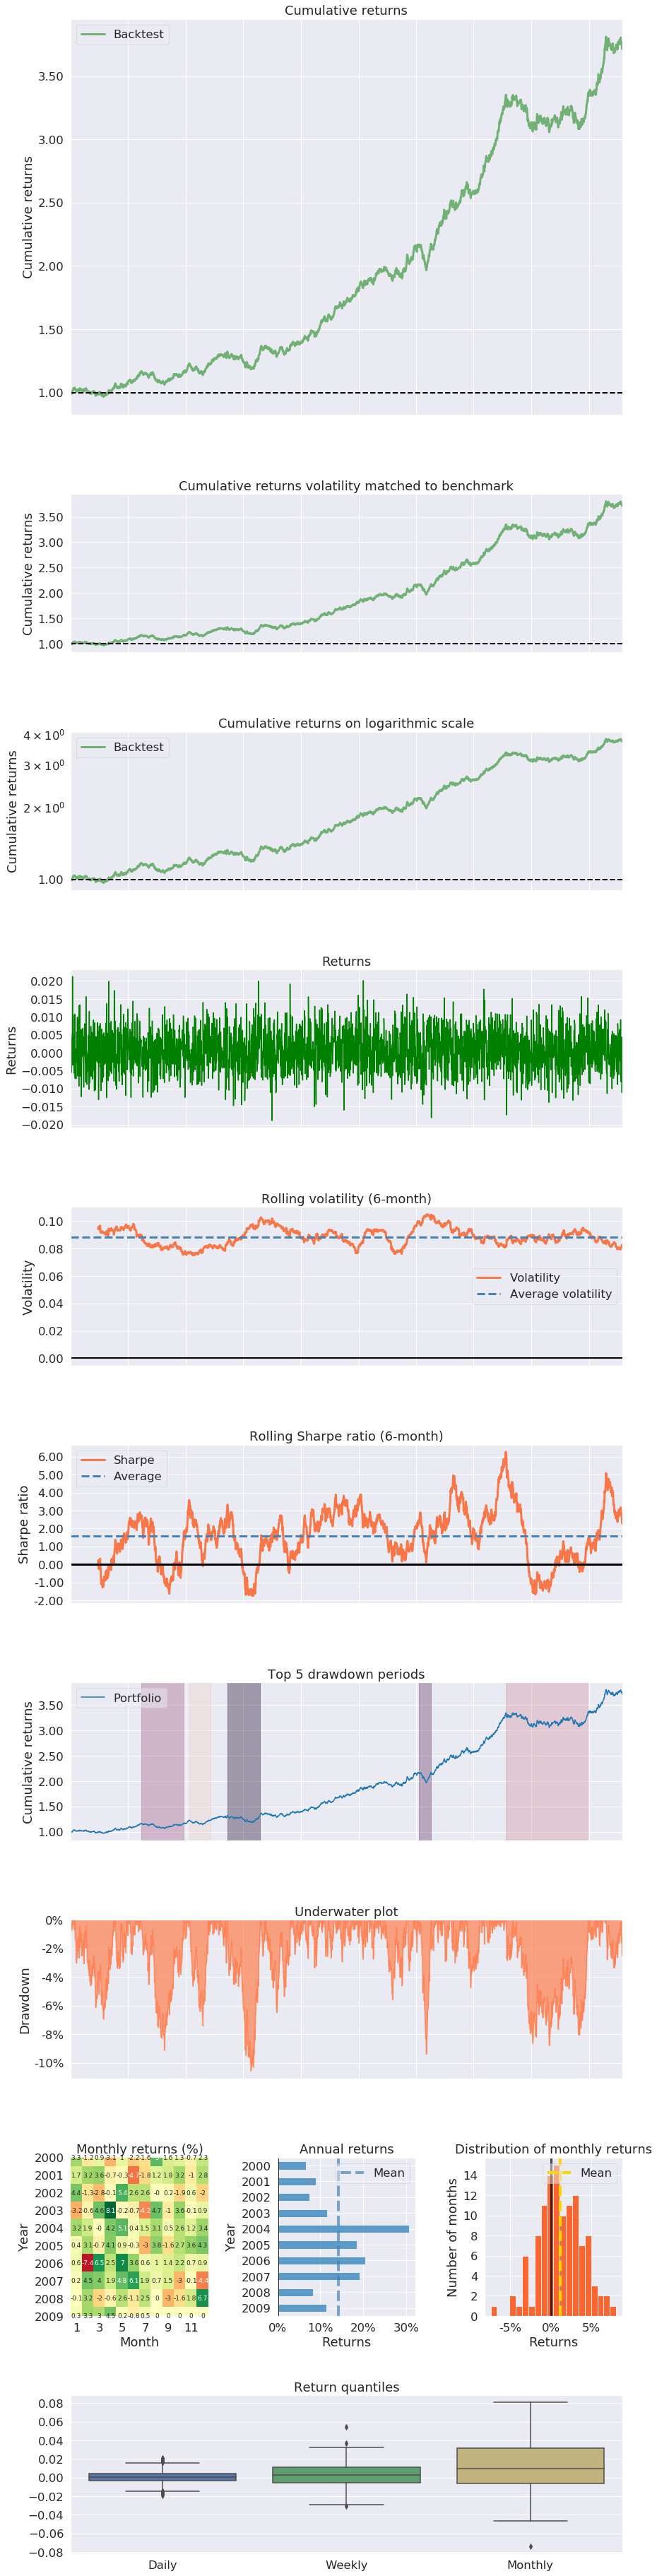

In [54]:
pf.tears.create_returns_tear_sheet(portfolio_total_return2)

In [55]:
portfolio_total_return_kelly = np.sum([2.86865963e-12, 2.26342494e-11, 3.30438909e-01, 3.81809412e-01, 2.87751679e-01] * Strategies_A_B, axis=1)

/Users/Mario/opt/anaconda3/envs/EPAT36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


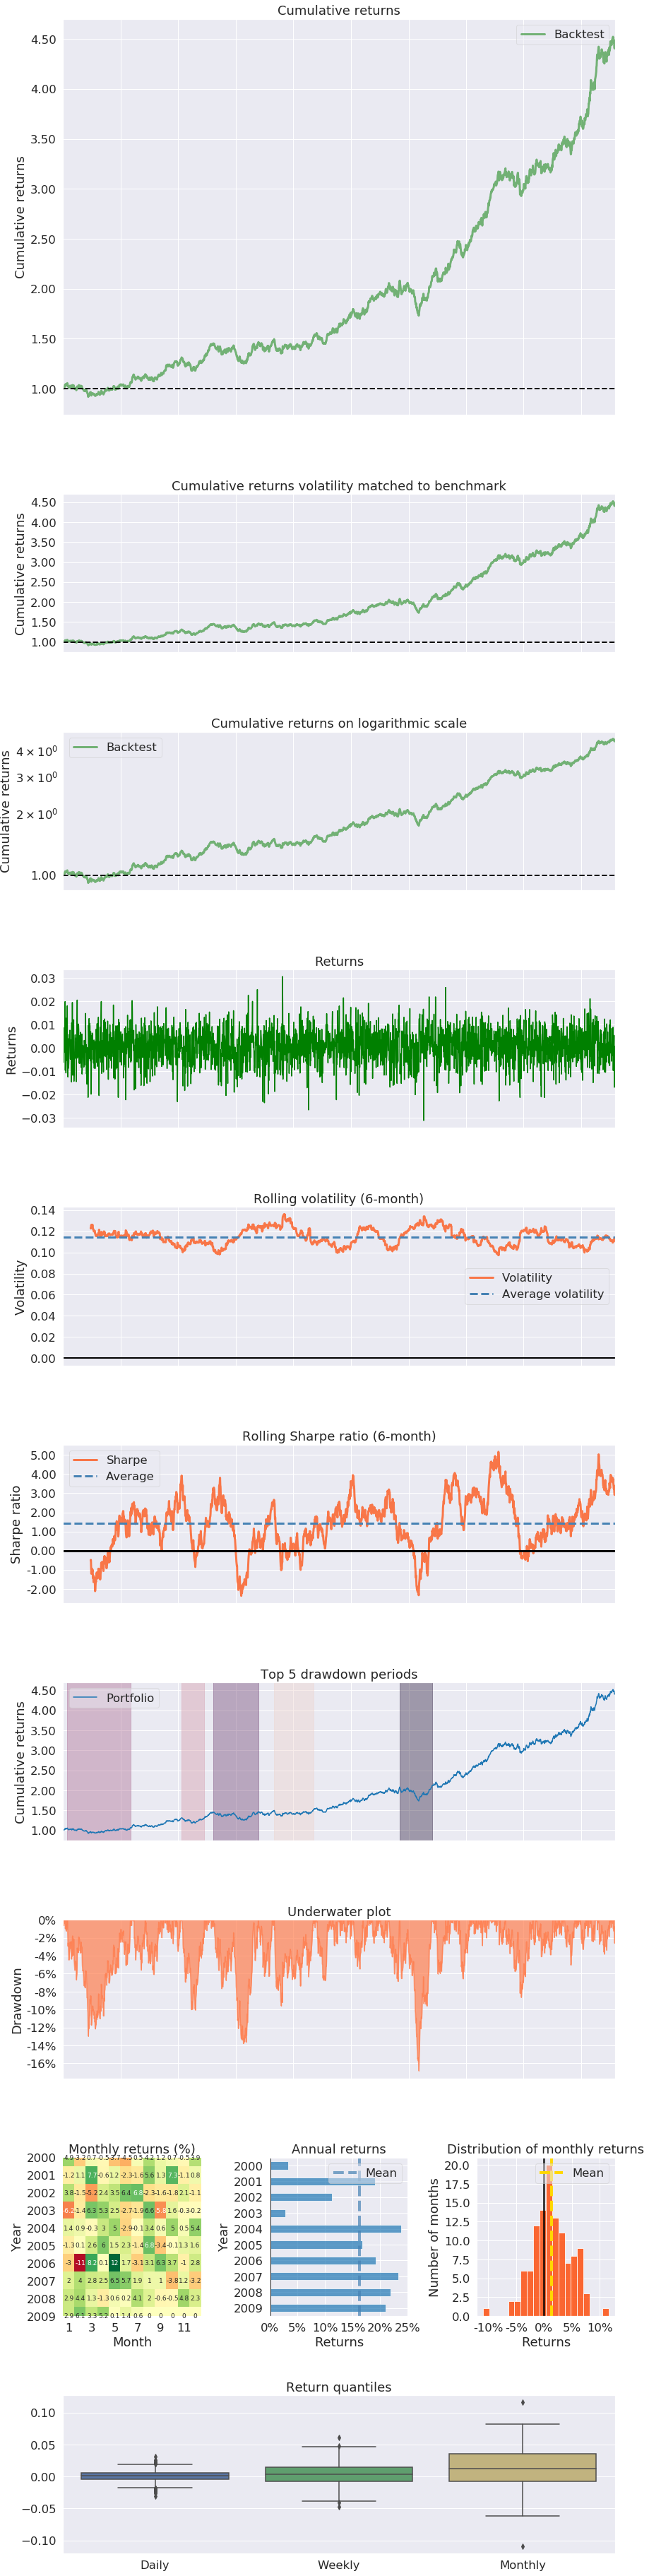

In [56]:
pf.tears.create_returns_tear_sheet(portfolio_total_return_kelly)

In [57]:
portfolio_total_return_markowitz = np.sum([0, 0, 0.336, 0.616, 0.047] * Strategies_A_B, axis=1)

/Users/Mario/opt/anaconda3/envs/EPAT36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


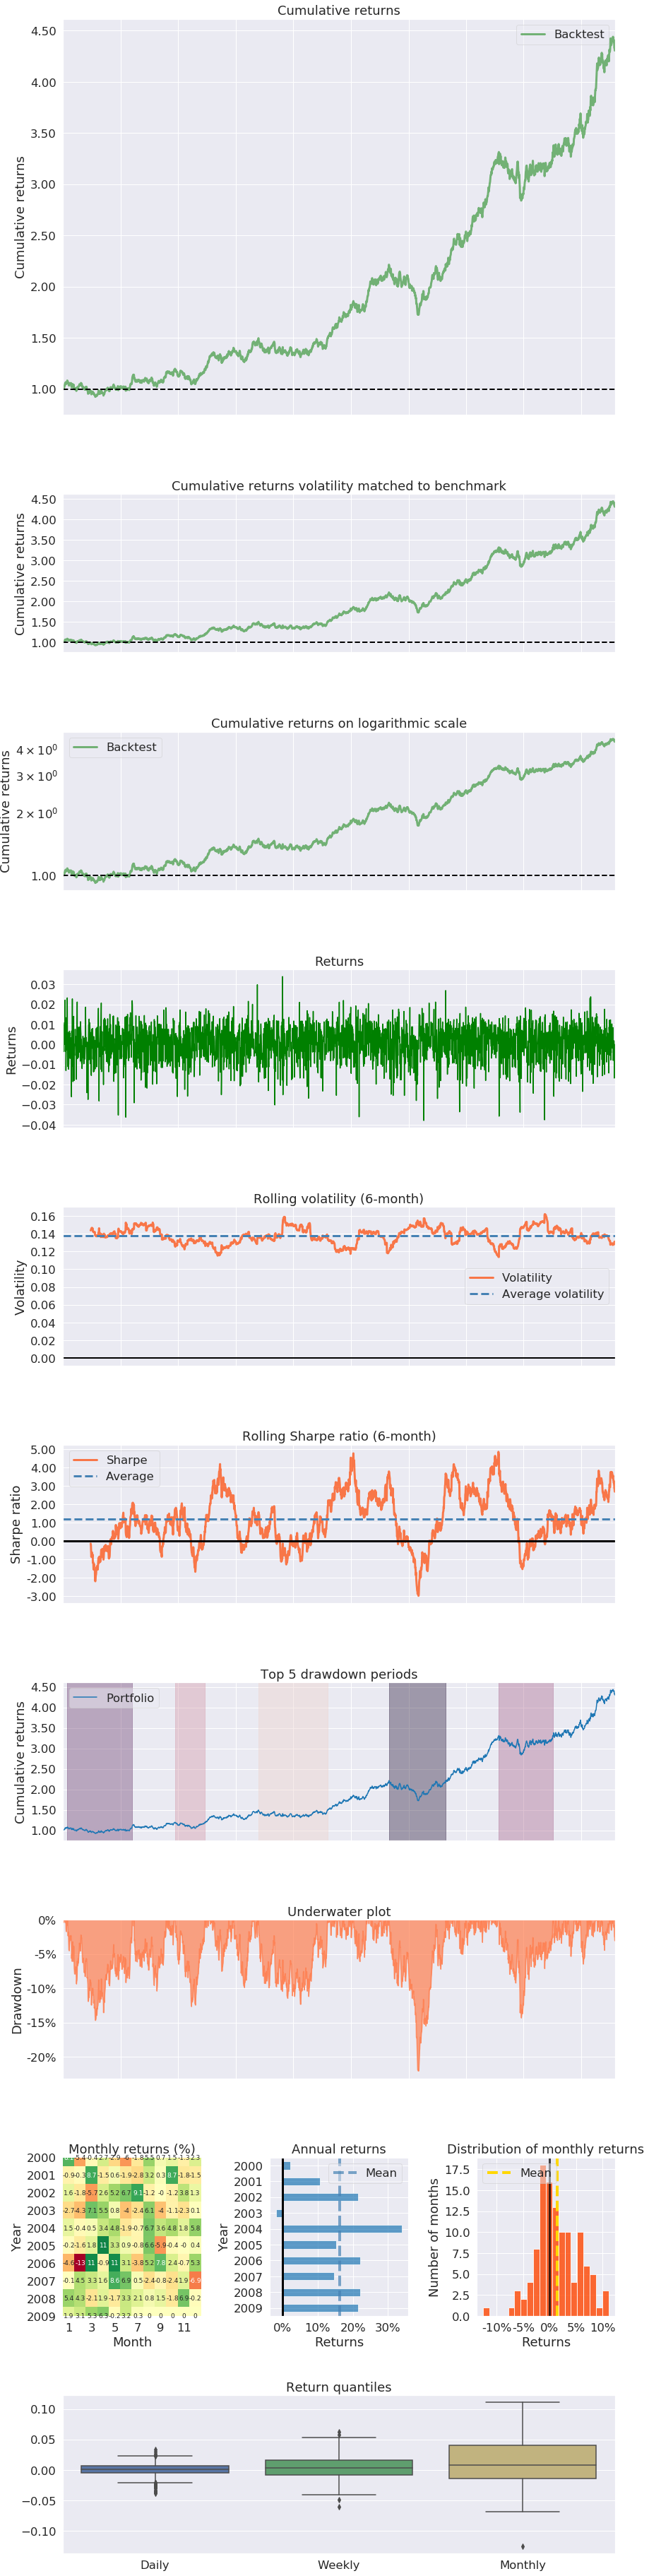

In [58]:
pf.tears.create_returns_tear_sheet(portfolio_total_return_markowitz)